In [1]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Libraries</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pandas.io.formats.style import Styler
import math

import warnings
warnings.filterwarnings('ignore')

tqdm.pandas()

rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#91013E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn import model_selection
from sklearn import metrics

<p align="right">
  <img src="https://drive.google.com/uc?export=view&id=1_U7gAulCbZR3z4v_AT36kgOqomJAt6Qw"/>
</p>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Intro</p>

This Kaggle notebook is aimed at providing a comprehensive exploratory data analysis (EDA) for the given dataset, with the ultimate goal of making informed decisions and recommendations before diving into modeling. 
>Through this EDA, we will gain a deeper understanding of the data structure, missing values, relationships between variables, and any patterns or anomalies that could impact our modeling process. By performing a thorough EDA, we can identify potential roadblocks and make necessary pre-processing decisions that will improve the performance and accuracy of our models. So, buckle up, and let's embark on this journey of discovering insights and valuable information from the data to drive better modeling decisions.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Data</p>

**The dataset** for this competition (both train and test) was generated from a deep learning model trained on the [vector-borne-disease-prediction](https://www.kaggle.com/datasets/richardbernat/vector-borne-disease-prediction). Our task is to predict the target `prognosis` of Vector-borne diseases.

>[Vectors](https://www.who.int/news-room/fact-sheets/detail/vector-borne-diseases#:~:text=and%20community%20mobilisation.-,Vectors,-Vectors%20are%20living) are living organisms that can transmit infectious pathogens between humans, or from animals to humans. Many of these vectors are bloodsucking insects, which ingest disease-producing microorganisms during a blood meal from an infected host (human or animal) and later transmit it into a new host, after the pathogen has replicated. Often, once a vector becomes infectious, they are capable of transmitting the pathogen for the rest of their life during each subsequent bite/blood meal.

>[Vector-borne diseases](https://www.who.int/news-room/fact-sheets/detail/vector-borne-diseases#:~:text=bite/blood%20meal.-,Vector%2Dborne%20diseases,-Vector%2Dborne%20diseases) are human illnesses caused by parasites, viruses and bacteria that are transmitted by vectors. Every year there are more than 700,000 deaths from diseases such as malaria, dengue, schistosomiasis, human African trypanosomiasis, leishmaniasis, Chagas disease, yellow fever, Japanese encephalitis and onchocerciasis. 
 
There are 64 independent variables (including `id`):

* `sudden_fever`: a temporary rise in body temperature `0` or not `1`.
* `headache`: `0` or not `1`.
* `mouth_bleed`: `0` or not `1`.
* `nose_bleed`: `0` or not `1`.
* `muscle_pain`: `0` or not `1`.
* `joint_pain`: `0` or not `1`.
* `vomiting`: `0` or not `1`.
* `rash`: any area of irritated or swollen skin on your body `0` or not `1`.
* `diarrhea`: loose, watery and possibly more-frequent bowel movements  `0` or not `1`.
* `hypotension`: a sudden drop in blood pressure when standing from a sitting position or after lying down `0` or not `1`.
* `pleural_effusion`: a the build-up of excess fluid between the layers of the pleura `0` or not `1`.
* `ascites`: an abdominal swelling caused by accumulation of fluid `0` or not `1`.
* `gastro_bleeding`: `0` or not `1`.
* `swelling`: `0` or not `1`.
* `nausea`:  an uneasiness of the stomach that often comes before vomiting `0` or not `1`.
* `chills`: a feeling of being cold, though not necessarily in a cold environment `0` or not `1`.
* `myalgia`: a soreness and achiness in the muscles that can range from mild to severe `0` or not `1`.
* `digestion_trouble`: `0` or not `1`.
* `fatigue`: `0` or not `1`.
* `skin_lesions`: an injury or damage of a skin, like sunburn `0` or not `1`.
* `stomach_pain`: `0` or not `1`.
* `orbital_pain`: a physical discomfort in the eye's surface or deep within the eye `0` or not `1`.
* `neck_pain`: `0` or not `1`.
* `weakness`: `0` or not `1`.
* `back_pain`: `0` or not `1`.
* `weight_loss`: `0` or not `1`.
* `gum_bleed`: `0` or not `1`.
* `jaundice`: a yellow skin caused by the buildup of bilirubin `0` or not `1`.
* `coma`: a state of prolonged loss of consciousness `0` or not `1`.
* `diziness`: `0` or not `1`.
* `inflammation`: `0` or not `1`.
* `red_eyes`: `0` or not `1`.
* `loss_of_appetite`: `0` or not `1`.
* `urination_loss`: `0` or not `1`.
* `slow_heart_rate`: `0` or not `1`.
* `abdominal_pain`: `0` or not `1`.
* `light_sensitivity`: `0` or not `1`.
* `yellow_skin`: `0` or not `1`.
* `yellow_eyes`: `0` or not `1`.
* `facial_distortion`: `0` or not `1`.
* `microcephaly`: a condition where a baby's head is much smaller than expected `0` or not `1`.
* `rigor`: a sudden feeling of cold with shivering accompanied by a rise in temperature `0` or not `1`.
* `bitter_tongue`: `0` or not `1`.
* `convulsion`: `0` or not `1`.
* `anemia`: `0` or not `1`.
* `cocacola_urine`: a symptom defining an abnormal darkness of the urine `0` or not `1`.
* `hypoglycemia`: a low blood sugar `0` or not `1`.
* `prostraction`: an extreme physical weakness `0` or not `1`.
* `hyperpyrexia`:  a condition where the body temperature goes above 106.7 degrees Fahrenheit (41.5 degrees Celsius) `0` or not `1`.
* `stiff_neck`: `0` or not `1`.
* `irritability`: `0` or not `1`.
* `confusion`: `0` or not `1`.
* `tremor`:  a rhythmic shaking in your hands, arms, head, legs, or torso `0` or not `1`.
* `paralysis`: `0` or not `1`.
* `lymph_swells`: `0` or not `1`.
* `breathing_restriction`: `0` or not `1`.
* `toe_inflammation`: `0` or not `1`.
* `finger_inflammation`: `0` or not `1`.
* `lips_irritation`: `0` or not `1`.
* `itchiness`: `0` or not `1`.
* `ulcers`: sores on the lining of your stomach or small intestine `0` or not `1`.
* `toenail_loss`: `0` or not `1`.
* `speech_problem`: `0` or not `1`.
* `bullseye_rash`: a skin rash that has a "bull's eye" appearance `0` or not `1`.

Target varibale:
* `prognosis`: The likely disease (`11` Classes).

**Metrics**:
* [MAP@3](https://www.kaggle.com/code/nandeshwar/mean-average-precision-map-k-metric-explained-code/notebook).

In [3]:
PATH_ORIGIN = '/kaggle/input/vector-borne-disease-prediction/trainn.csv'
PATH_TRAIN = '/kaggle/input/playground-series-s3e13/train.csv'
PATH_TEST = '/kaggle/input/playground-series-s3e13/test.csv'
PATH_SUB = '/kaggle/input/playground-series-s3e13/sample_submission.csv'

origin = pd.read_csv(PATH_ORIGIN)
train =  pd.read_csv(PATH_TRAIN).drop(columns='id')
test =   pd.read_csv(PATH_TEST).drop(columns='id')

origin.prognosis = origin.prognosis.str.replace(' ', '_')

In [4]:
print(f'{blk}[INFO] Shapes:'
      f'{blk}\n[+] origin ->  {red}{origin.shape}'
      f'{blk}\n[+] train  -> {red}{train.shape}'
      f'{blk}\n[+] test   ->  {red}{test.shape}\n')

print(f'{blk}[INFO] Any missing values:'
      f'{blk}\n[+] origin -> {red}{origin.isna().any().any()}'
      f'{blk}\n[+] train  -> {red}{train.isna().any().any()}'
      f'{blk}\n[+] test   -> {red}{test.isna().any().any()}')

[INFO] Shapes:
[+] origin ->  (252, 65)
[+] train  -> (707, 65)
[+] test   ->  (303, 64)

[INFO] Any missing values:
[+] origin -> False
[+] train  -> False
[+] test   -> False


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Feature Stat Overview</p>

This notebook provides a code snippet of how effectively display dataframes in a tidy format using Pandas Styler class.

We are going to leverage CSS styling language to manipulate many parameters including colors, fonts, borders, background, format and make our tables interactive.


**Reference**:
* [Pandas Table Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).

At this point, you will require a certain level of understanding in web development.

Primarily, you will have to modify the CSS of the `td`, `tr`, and `th` tags.

**You can refer** to the following materials to learn **HTML/CSS**:
* [w3schools HTML Tutorial](https://www.w3schools.com/html/default.asp)
* [w3schools CSS Reference](https://www.w3schools.com/cssref/index.php)

In [5]:
 def magnify(is_test: bool = False):
        base_color = '#91013E'
        if is_test:
            highlight_target_row = []
        else:
            highlight_target_row = [dict(selector='tr:last-child',
                                         props=[('background-color', f'{base_color}'+'20')])]
            
        return [dict(selector="th",
                     props=[("font-size", "11pt"),
                            ('background-color', f'{base_color}'),
                            ('color', 'white'),
                            ('font-weight', 'bold'),
                            ('border-bottom', '0.1px solid white'),
                            ('border-left', '0.1px solid white'),
                            ('text-align', 'right')]),

                dict(selector='th.blank.level0', 
                    props=[('font-weight', 'bold'),
                           ('border-left', '1.7px solid white'),
                           ('background-color', 'white')]),

                dict(selector="td",
                     props=[('padding', "0.5em 1em"),
                            ('text-align', 'right')]),

                dict(selector="th:hover",
                     props=[("font-size", "14pt")]),

                dict(selector="tr:hover td:hover",
                     props=[('max-width', '250px'),
                            ('font-size', '14pt'),
                            ('color', f'{base_color}'),
                            ('font-weight', 'bold'),
                            ('background-color', 'white'),
                            ('border', f'1px dashed {base_color}')]),
                
                 dict(selector="caption",
                      props=[(('caption-side', 'bottom'))])] + highlight_target_row

def stylize_min_max_count(pivot_table):
    """Waps the min_max_count pivot_table into the Styler.

        Args:
            df: |min_train| max_train |min_test |max_test |top10_counts_train |top_10_counts_train|

        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = pivot_table
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i.startswith('m') else i):
              ('{:.3f}' if i.startswith('m') else '{:}') for i in s.columns}

    s = s.style.set_table_styles(magnify(True))\
        .format(di_frmt)\
        .set_caption(f"The train and test datasets min, max, top10 values side by side (hover to magnify).")
    return s
  
    
def stylize_describe(df: pd.DataFrame, dataset_name: str = 'train', is_test: bool = False) -> Styler:
    """Applies .descibe() method to the df and wraps it into the Styler.
    
        Args:
            df: any dataframe (train/test/origin)
            dataset_name: default 'train'
            is_test: the bool parameter passed into magnify() function
                     in order to control the highlighting of the last row.
                     
        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = df.describe().T
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i == 'count' else i):
              ('{:.0f}' if i == 'count' else '{:.3f}') for i in s.columns}
    
    s = s.style.set_table_styles(magnify(is_test))\
        .format(di_frmt)\
        .set_caption(f"The {dataset_name} dataset descriptive statistics (hover to magnify).")
    return s

def stylize_simple(df: pd.DataFrame, caption: str) -> Styler:
    """Waps the min_max_count pivot_table into the Styler.

        Args:
            df: any dataframe (train/test/origin)

        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = df
    s = s.style.set_table_styles(magnify(True)).set_caption(f"{caption}")
    return s

display(stylize_simple(train.head(4), 'The train dataset 3 top rows (hover to magnify).'))

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Min Max and Unique Counts</p>

In [6]:
cm = sns.light_palette('#91013E', as_cmap=True)

counts_tr = pd.Series({ft: [train[ft].value_counts().round(3).iloc[:5].to_dict()] for ft in train.columns}, name='top_5_counts_train')
counts_te = pd.Series({ft: [test[ft].value_counts().round(3).iloc[:5].to_dict()] for ft in test.columns}, name='top_5_counts_test')
nunique_tr = train.nunique().rename('nunique_train')
nunique_te = test.nunique().rename('nunique_test')
nunique_te['prognosis'] = 0

min_max = train.describe().T[['min', 'max']].add_suffix('_train').join(test.describe().T[['min', 'max']].add_suffix('_test'))
stats_pivot = pd.concat([min_max, nunique_tr, nunique_te, counts_tr, counts_te], axis=1)
stylize_min_max_count(stats_pivot).background_gradient(cm, subset=['min_test', 'min_train', 'max_train', 'max_test'])

**Observations**:

* 1. We got `64` binary features.

**Takeaways:**
* Try to apply target encoders by binning the `prognosis`.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Distributions</p>

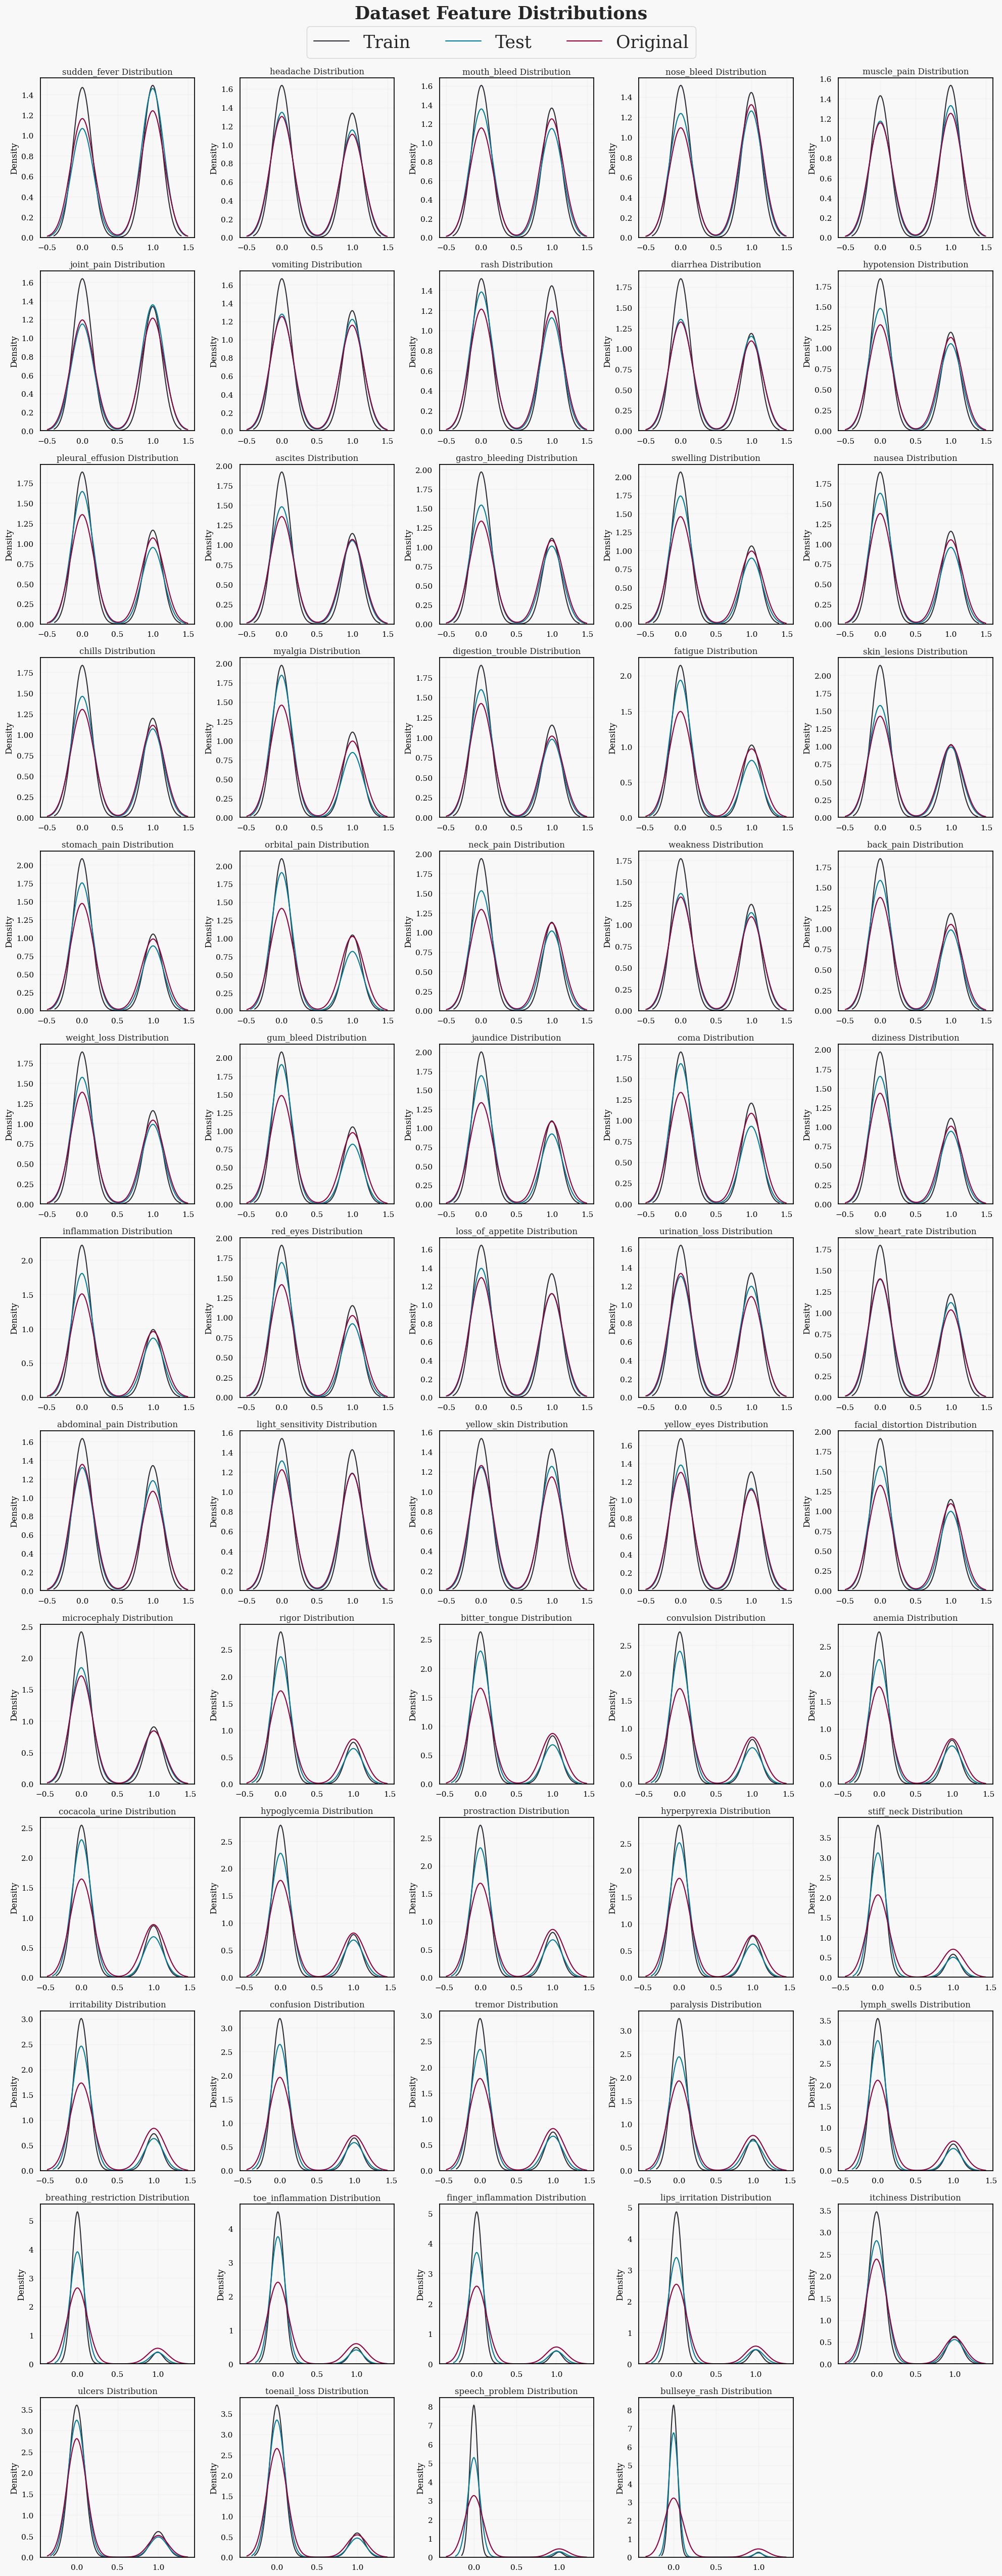

In [7]:
# kudos to @jcaliz
features = test.columns
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 5
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        train[column], label='Train',
        ax=ax[i], color=palette[0]
    )
    
    sns.kdeplot(
        test[column], label='Test',
        ax=ax[i], color=palette[1]
    )
    
    sns.kdeplot(
        origin[column], label='Original',
        ax=ax[i], color=palette[2]
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Dataset Feature Distributions\n\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.975), fontsize=25, ncol=3)
plt.tight_layout()

**Observations:**

* Feature distributions are close to, but not exactly the same, as the original.
* The organizers [tell us](https://www.kaggle.com/competitions/playground-series-s3e11/data) to feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Things to remember:**
>A synthetic dataset is a type of dataset created by generating new data that mimics the original data using various techniques. However, it is possible that the synthetic dataset features may not closely follow the original dataset distribution (our case). This can occur due to a variety of factors, such as using a different sampling technique, applying different data transformations, or introducing new features that were not present in the original dataset. When the synthetic dataset features do not closely follow the original dataset distribution, it can affect the performance of machine learning models trained on the origin data, as the models may not accurately capture the underlying patterns and relationships in the original data. Therefore, it is important to carefully evaluate the quality of both datasets before using them.

Let's take a look at the target variable:

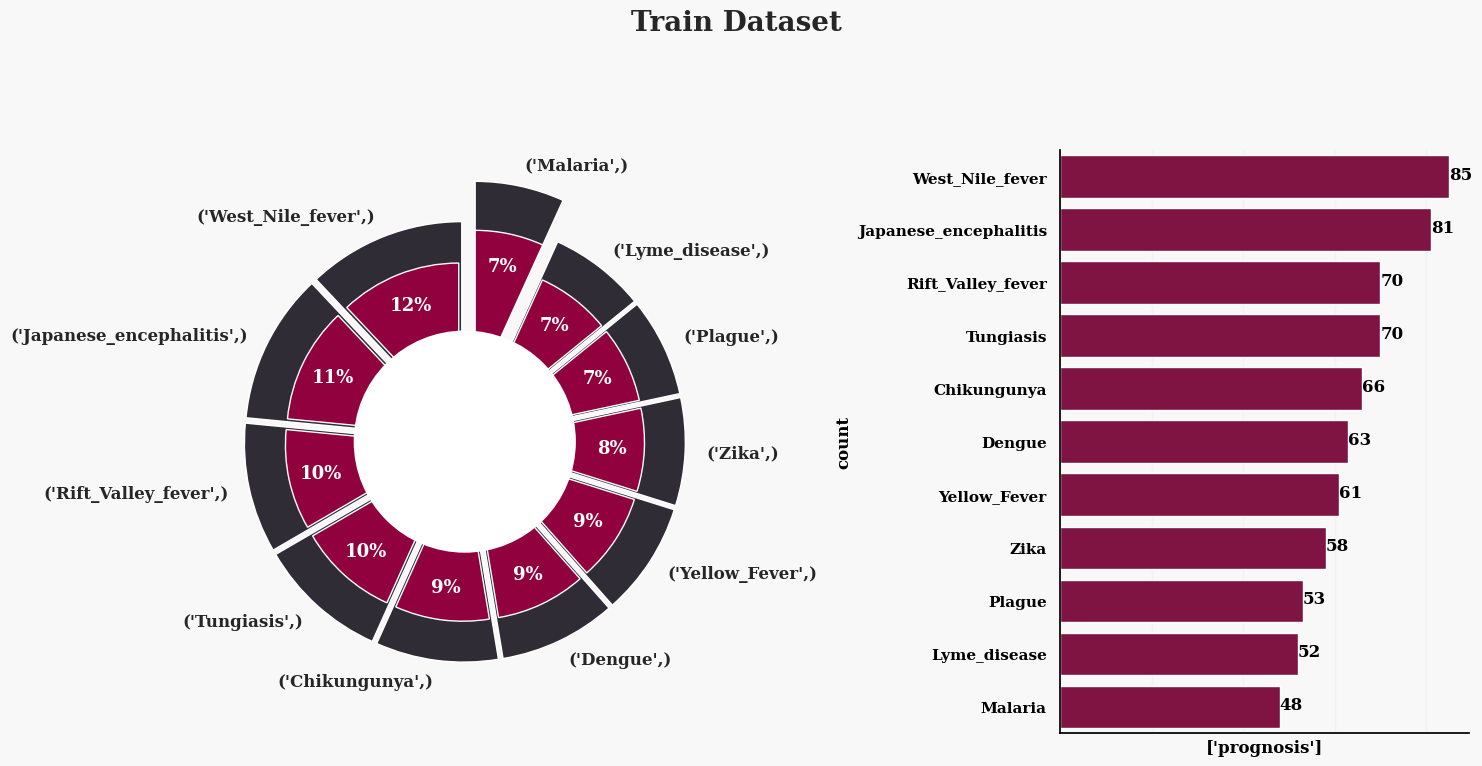

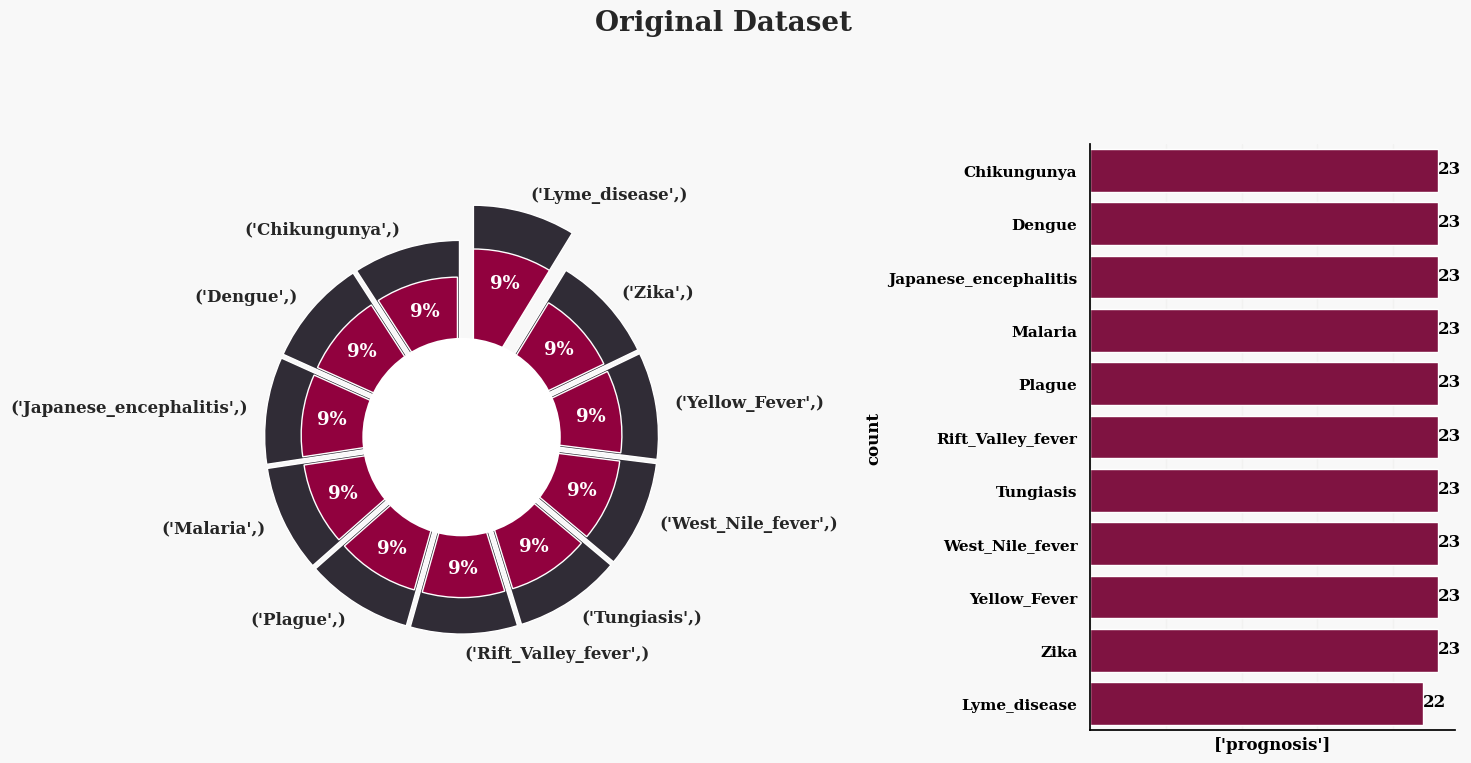

In [8]:
def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:
    """Draws the pie and count plots for categorical variables.
    
    Args:
        df: train or test dataframes
        col_list: a list of the selected categorical variables.
        title_name: 'Train' or 'Test' (default 'Train')
        
    Returns:
        subplots of size (len(col_list), 2)
    """
    f, ax = plt.subplots(len(col_list), 2, figsize=(15, 8))
    plt.subplots_adjust(wspace=0)
    
    s1 = df[col_list].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = palette[:1] * N
    inner_colors = palette[2:3] * N

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90,frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size':13, 
        'weight': 'bold', 
        'color':'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%',explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', 
                               fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    order = s1.index.get_level_values(0).tolist()
    sns.countplot(
        y=df[col_list[0]], ax=ax[1],
       orient='horizontal',  order=order, color=palette[2]
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.05, str(v), color='black', 
                     fontweight='bold', fontsize=12)

#     plt.title(col_list)
    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col_list, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name} Dataset', fontsize=20, fontweight='bold')
    plt.tight_layout()    
#     plt.savefig('data/plot_count.png')
    plt.show()
plot_count(train, ['prognosis'], 'Train')
plot_count(origin, ['prognosis'], 'Original')

**Observations**:
* The dataset is extremely small.
* The classes are well-balanced for the original data and relatively balanced for the synthetic dataset.
* All dataset features are categorical.

Let's look at the categorical features closer:

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Sparse Matrix Viz and Symptoms Clusters</p>

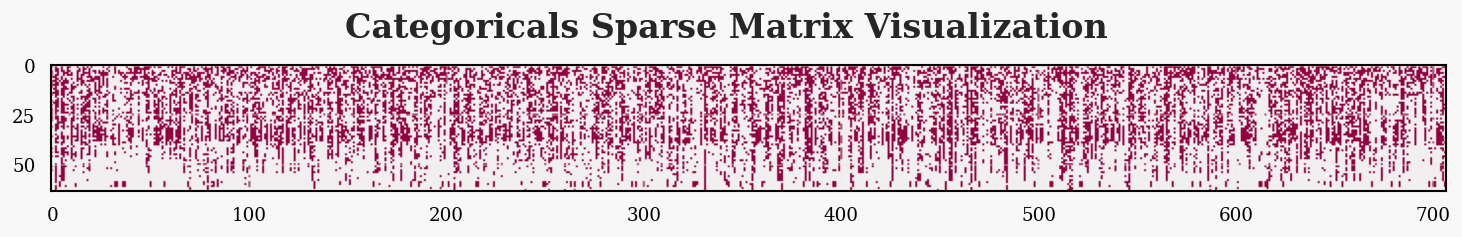

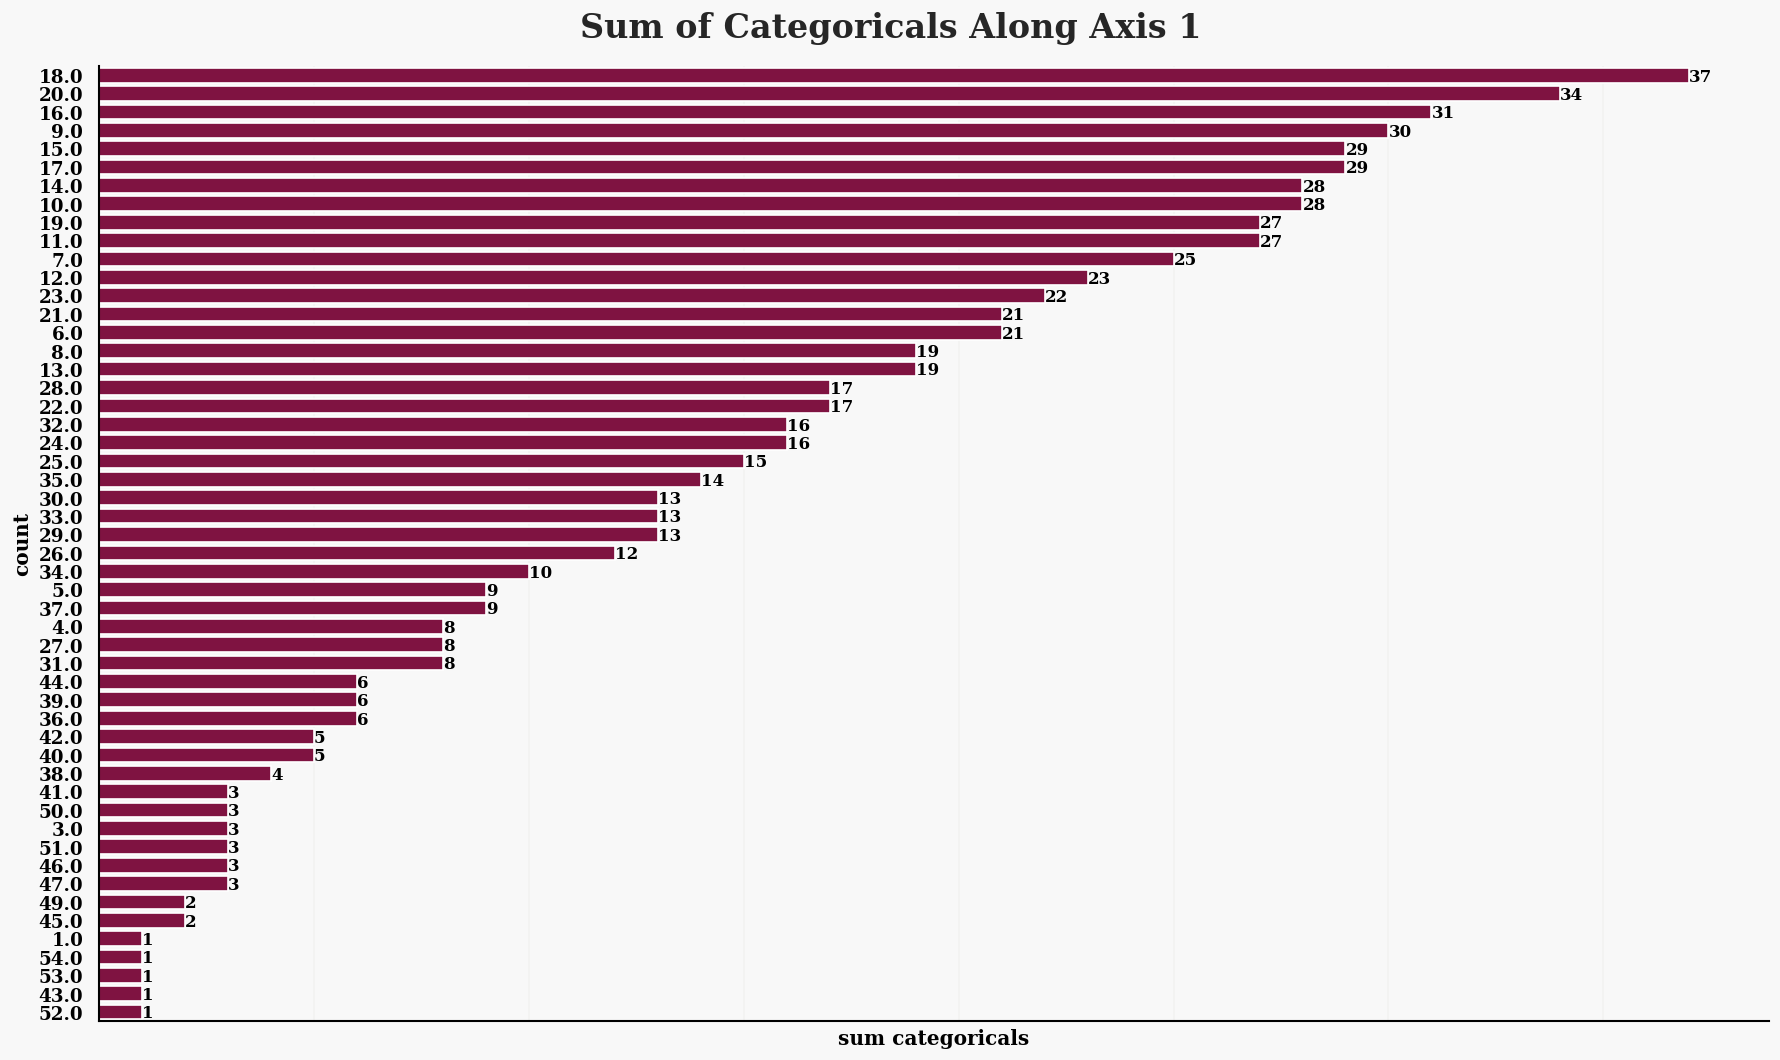

In [9]:
# Sparse Matrix Visualization.
fig = plt.figure(figsize=(15, 2), dpi=120)
plt.imshow(train[test.columns].T.values, cmap=cm)
fig.suptitle(f'Categoricals Sparse Matrix Visualization', fontsize=20, fontweight='bold');

# s1 - is the sum of the categoricals along axis 1.
cat_sum = train[test.columns].sum(1)
cat_sum.name = 'cat_sum'
s1 = cat_sum.value_counts()

fig = plt.figure(figsize=(15, 9), dpi=120)
ax = sns.barplot(y=s1.index, x=s1.values, orient='horizontal'
                 , order=s1.index, color=palette[2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    labelbottom=False
)

for i, v in enumerate(s1):
    ax.text(v, i+.3, str(v), color='black', 
                 fontweight='bold', fontsize=10);
plt.setp(ax.get_yticklabels(), fontweight="bold")
plt.setp(ax.get_xticklabels(), fontweight="bold")
ax.set_xlabel('sum categoricals', fontweight="bold", color='black')
ax.set_ylabel('count', fontweight="bold", color='black')
fig.suptitle(f'Sum of Categoricals Along Axis 1', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show();

stylize_describe(cat_sum.to_frame(), 'cat_sum')

**Observations**:
* `64` Categorical variables form a very sparse matrix.
* On average, there are `20` symptoms/conditions per observation.
* There some extremes such as `1` symptom/condition or up to `54` symptoms per observation.

It would be nice to see the categorical features in the clusters per the disease:

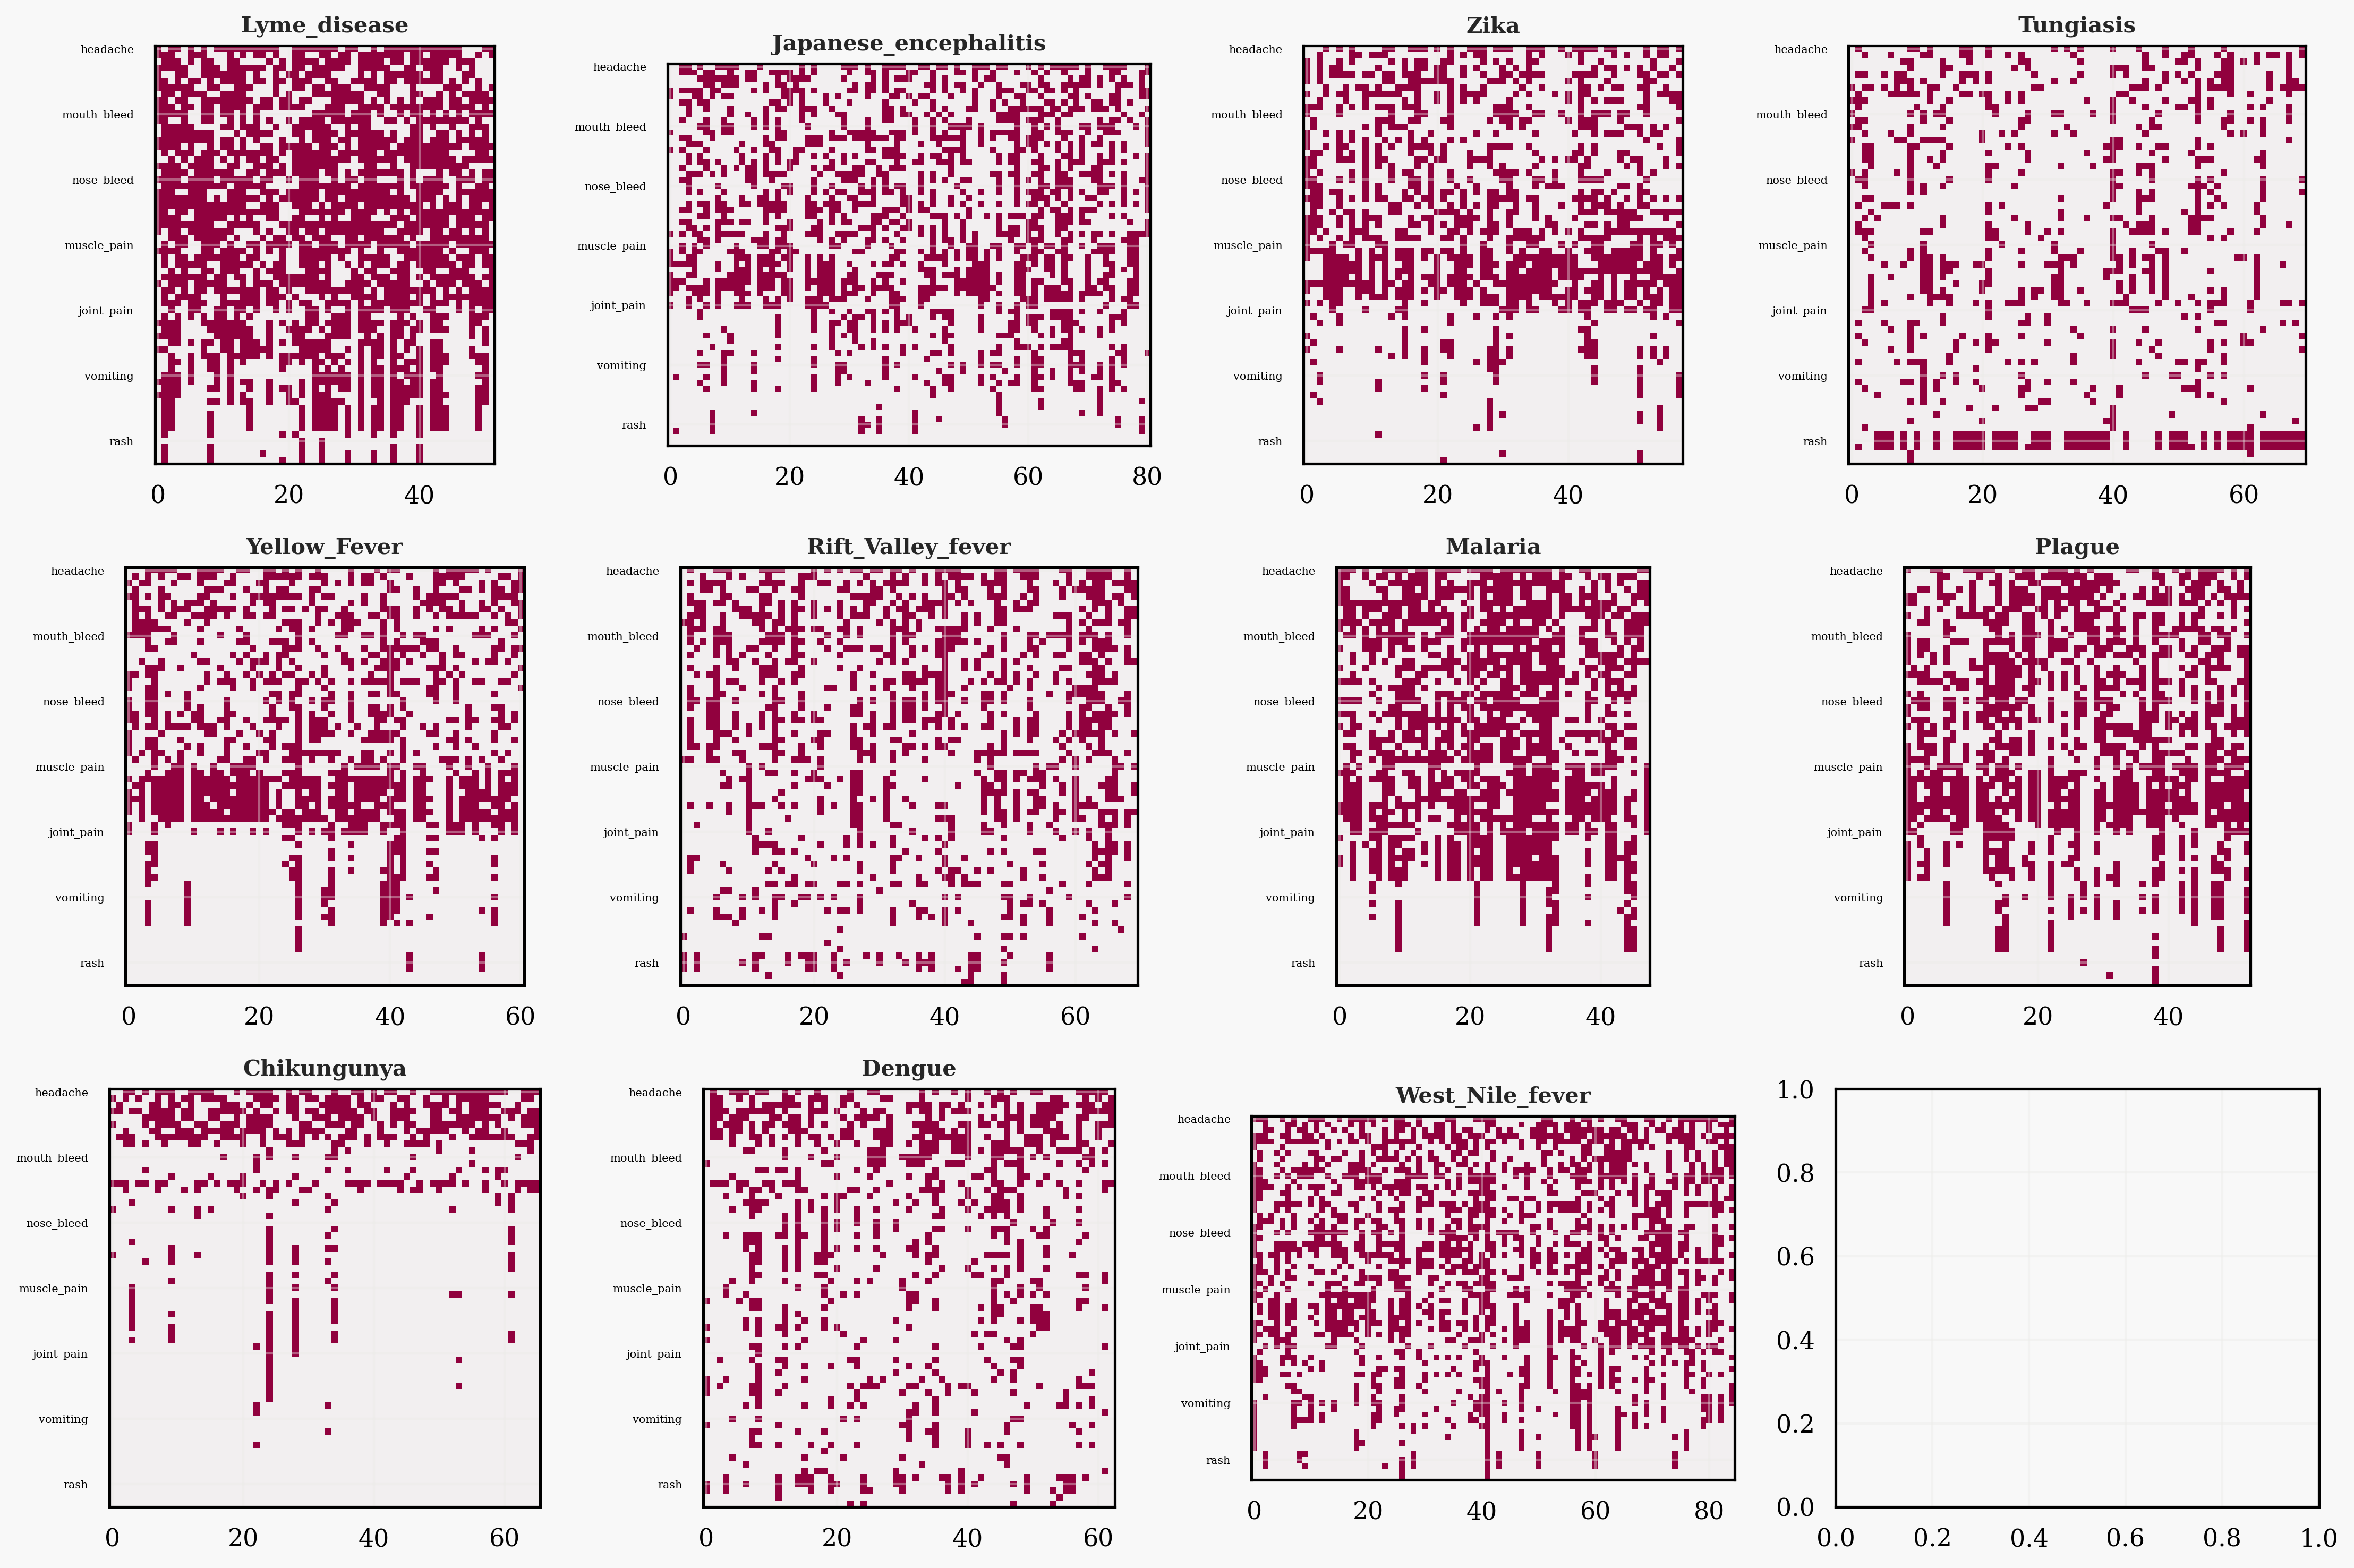

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10), dpi=300)
ax = ax.flatten()

for i, disease in enumerate(set(train.prognosis)):
    ax[i].imshow(train.query('prognosis == @disease')[test.columns].values.T, cmap=cm)
    ax[i].set_yticklabels(train.query('prognosis == @disease')[test.columns].columns.tolist(), fontdict={'fontsize': 5})
    ax[i].set_title(f'{disease}', fontsize=10, fontweight='bold')

plt.tight_layout();

**Observations**:
* We can notice that the particular diseases are characterized by the specific set of symptoms and conditions. Look at `Tungiasis` for example.
`Tungiasis` is a painful, itchy skin condition that occurs when female sand fleas burrow into your skin to feed as they lay their eggs. There is no surprise to see skin related symptoms for this disease.
* `Malaria` and `Lyme disease` can produce a wide range of symptoms (`fever`, `chills`, `headache`, `fatigue`, `muscle and joint aches`, and `swollen lymph nodes` may occur in the absence of `rash`).

**Takeaways:**
* It makes sense to look at each sparce matrix separately.
* The symptoms cab be clustered/grouped.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Correlations</p>

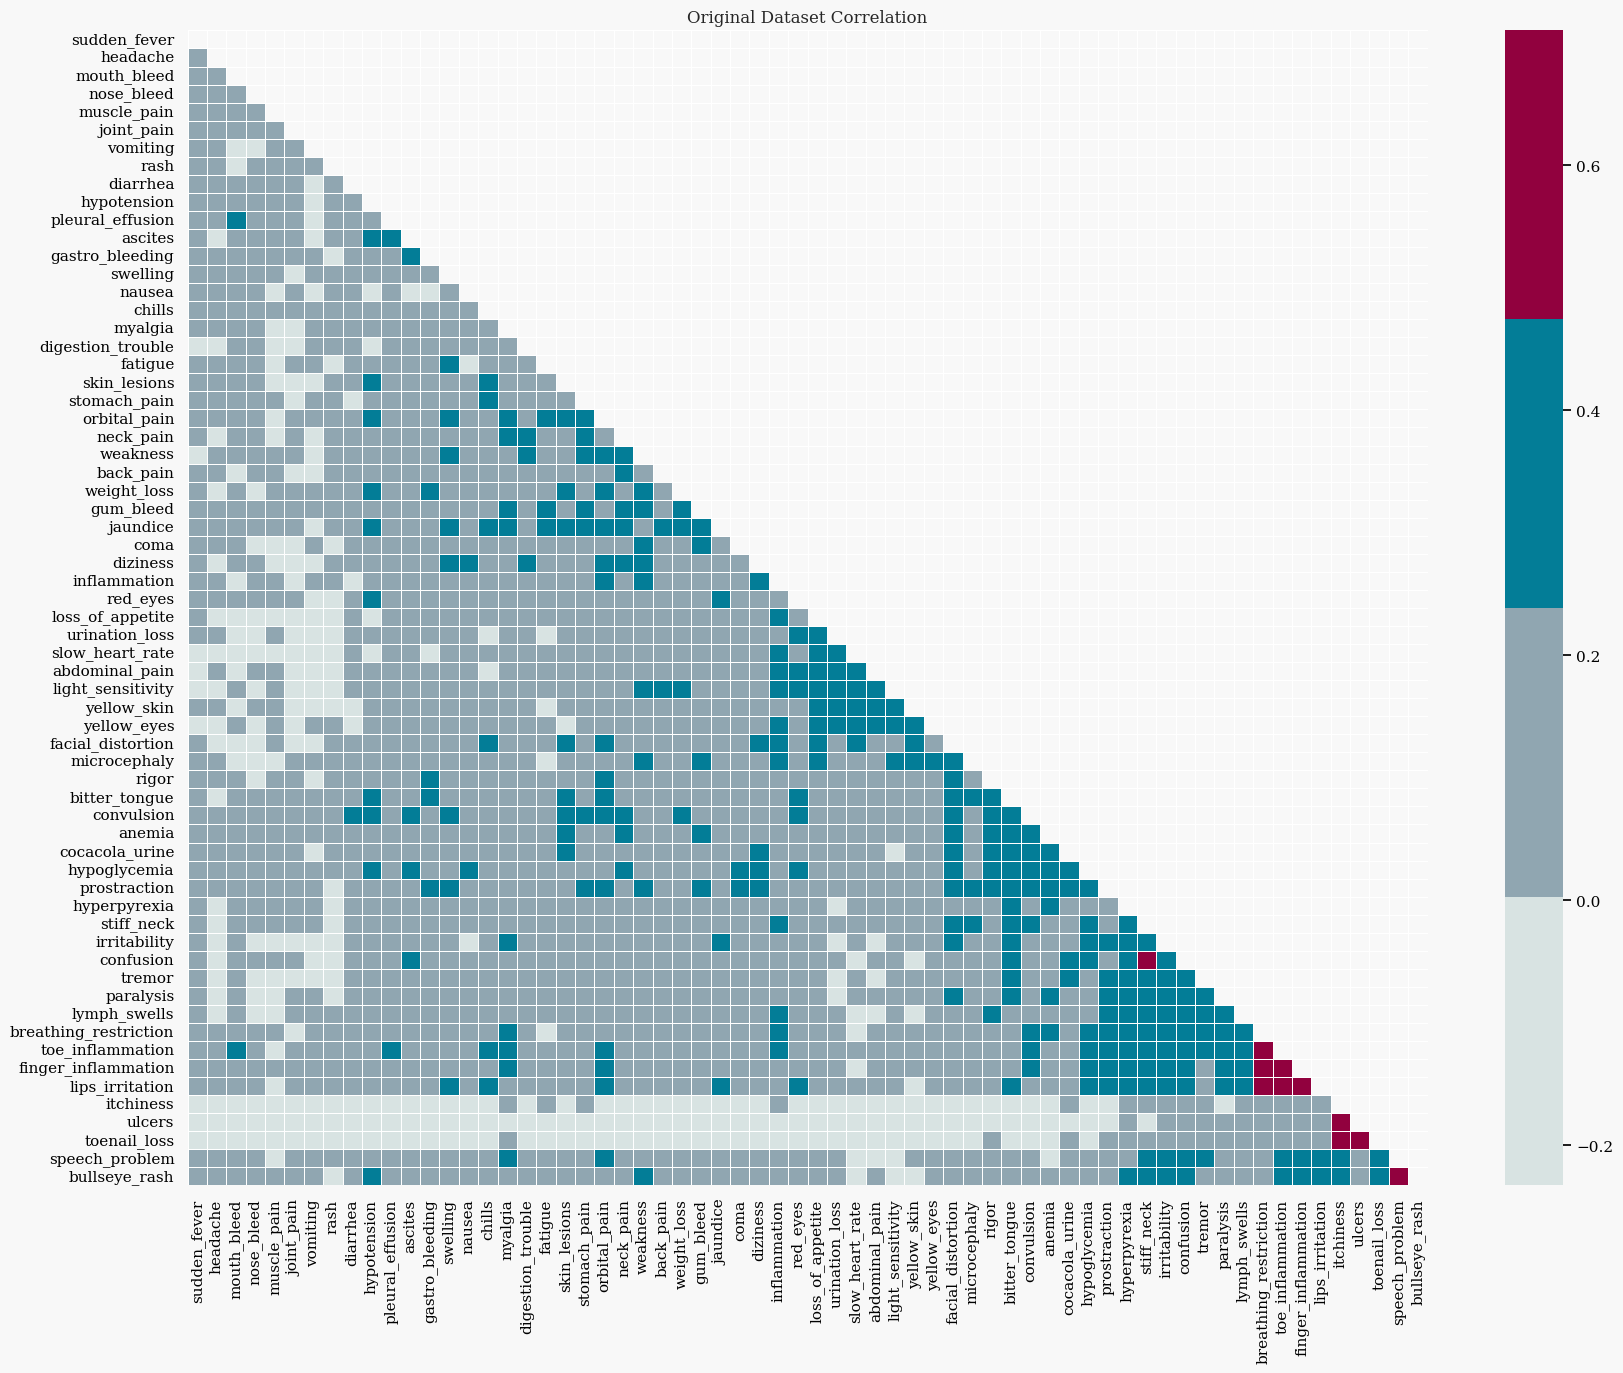

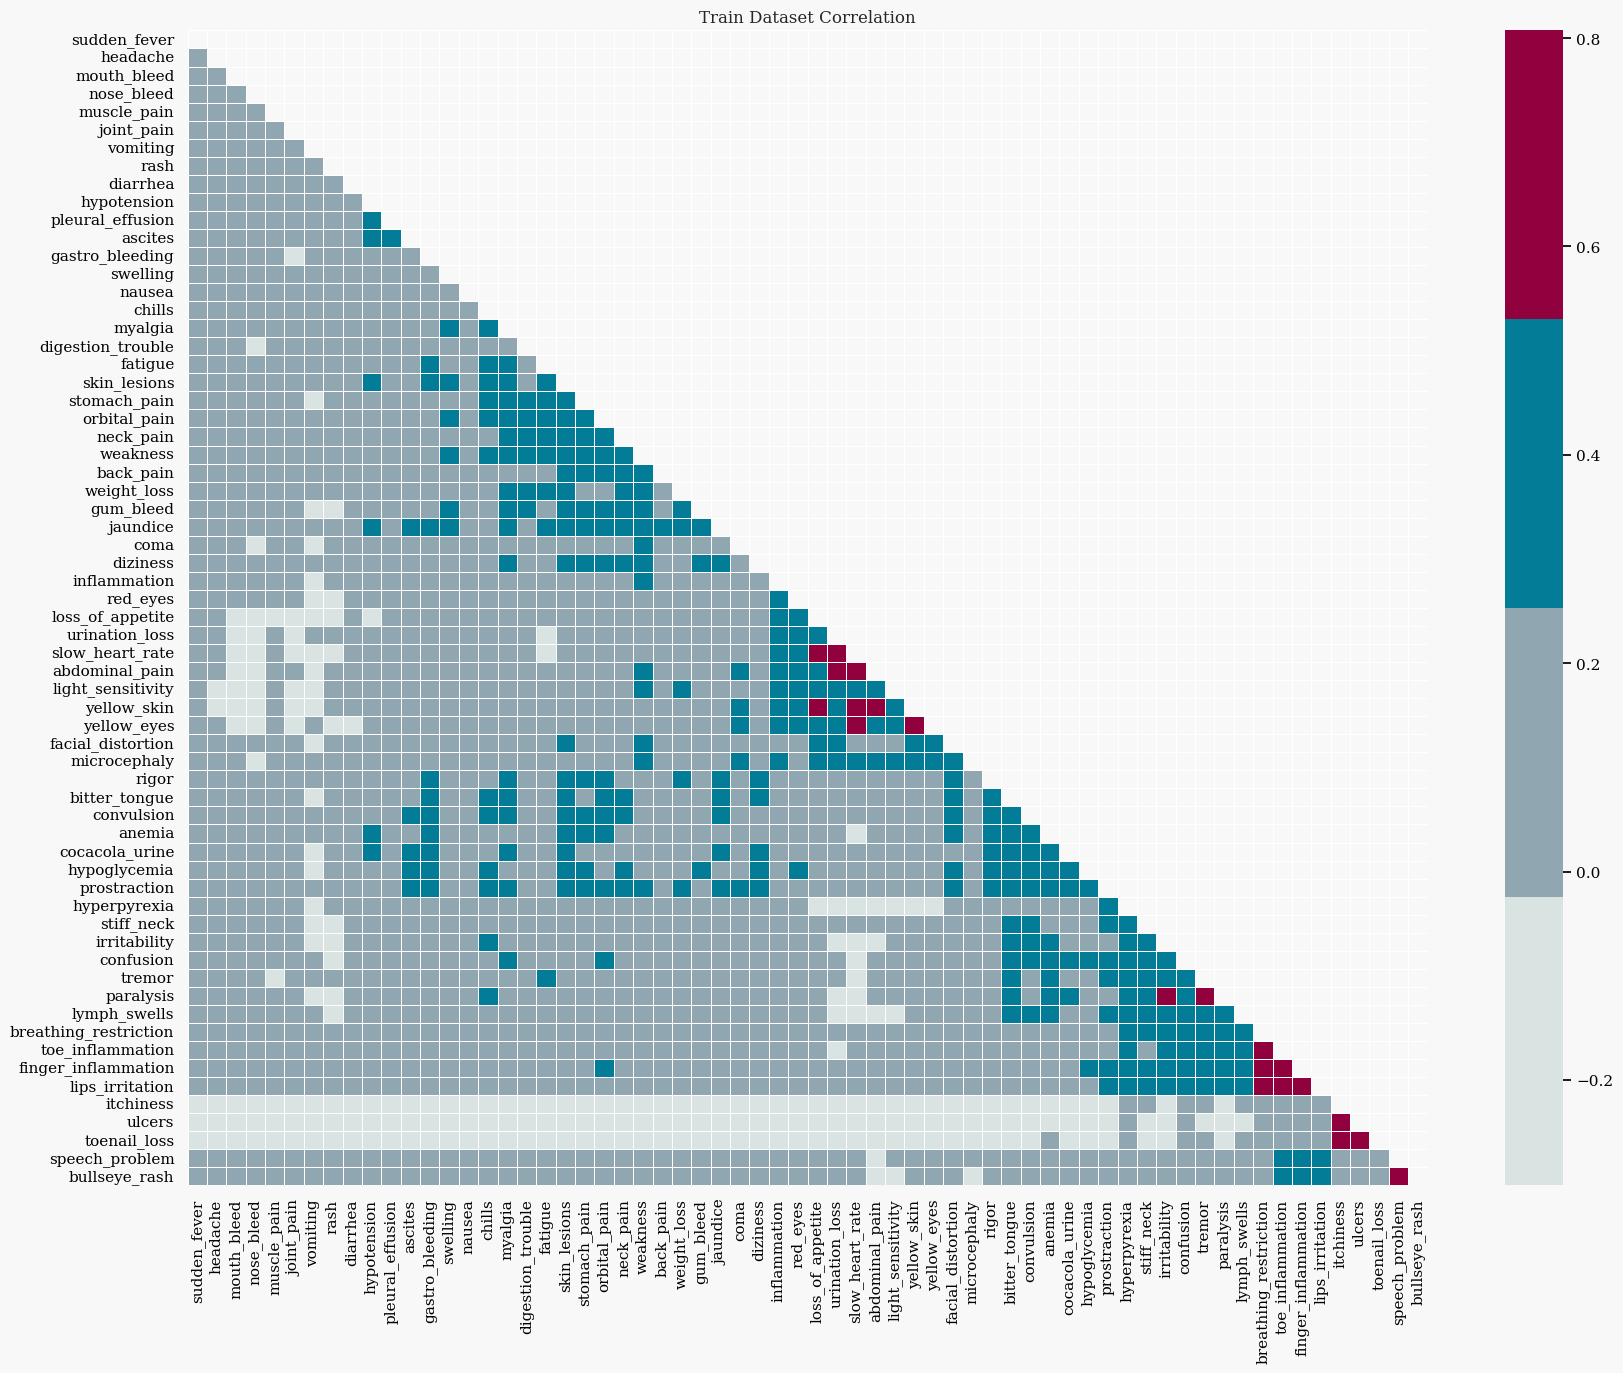

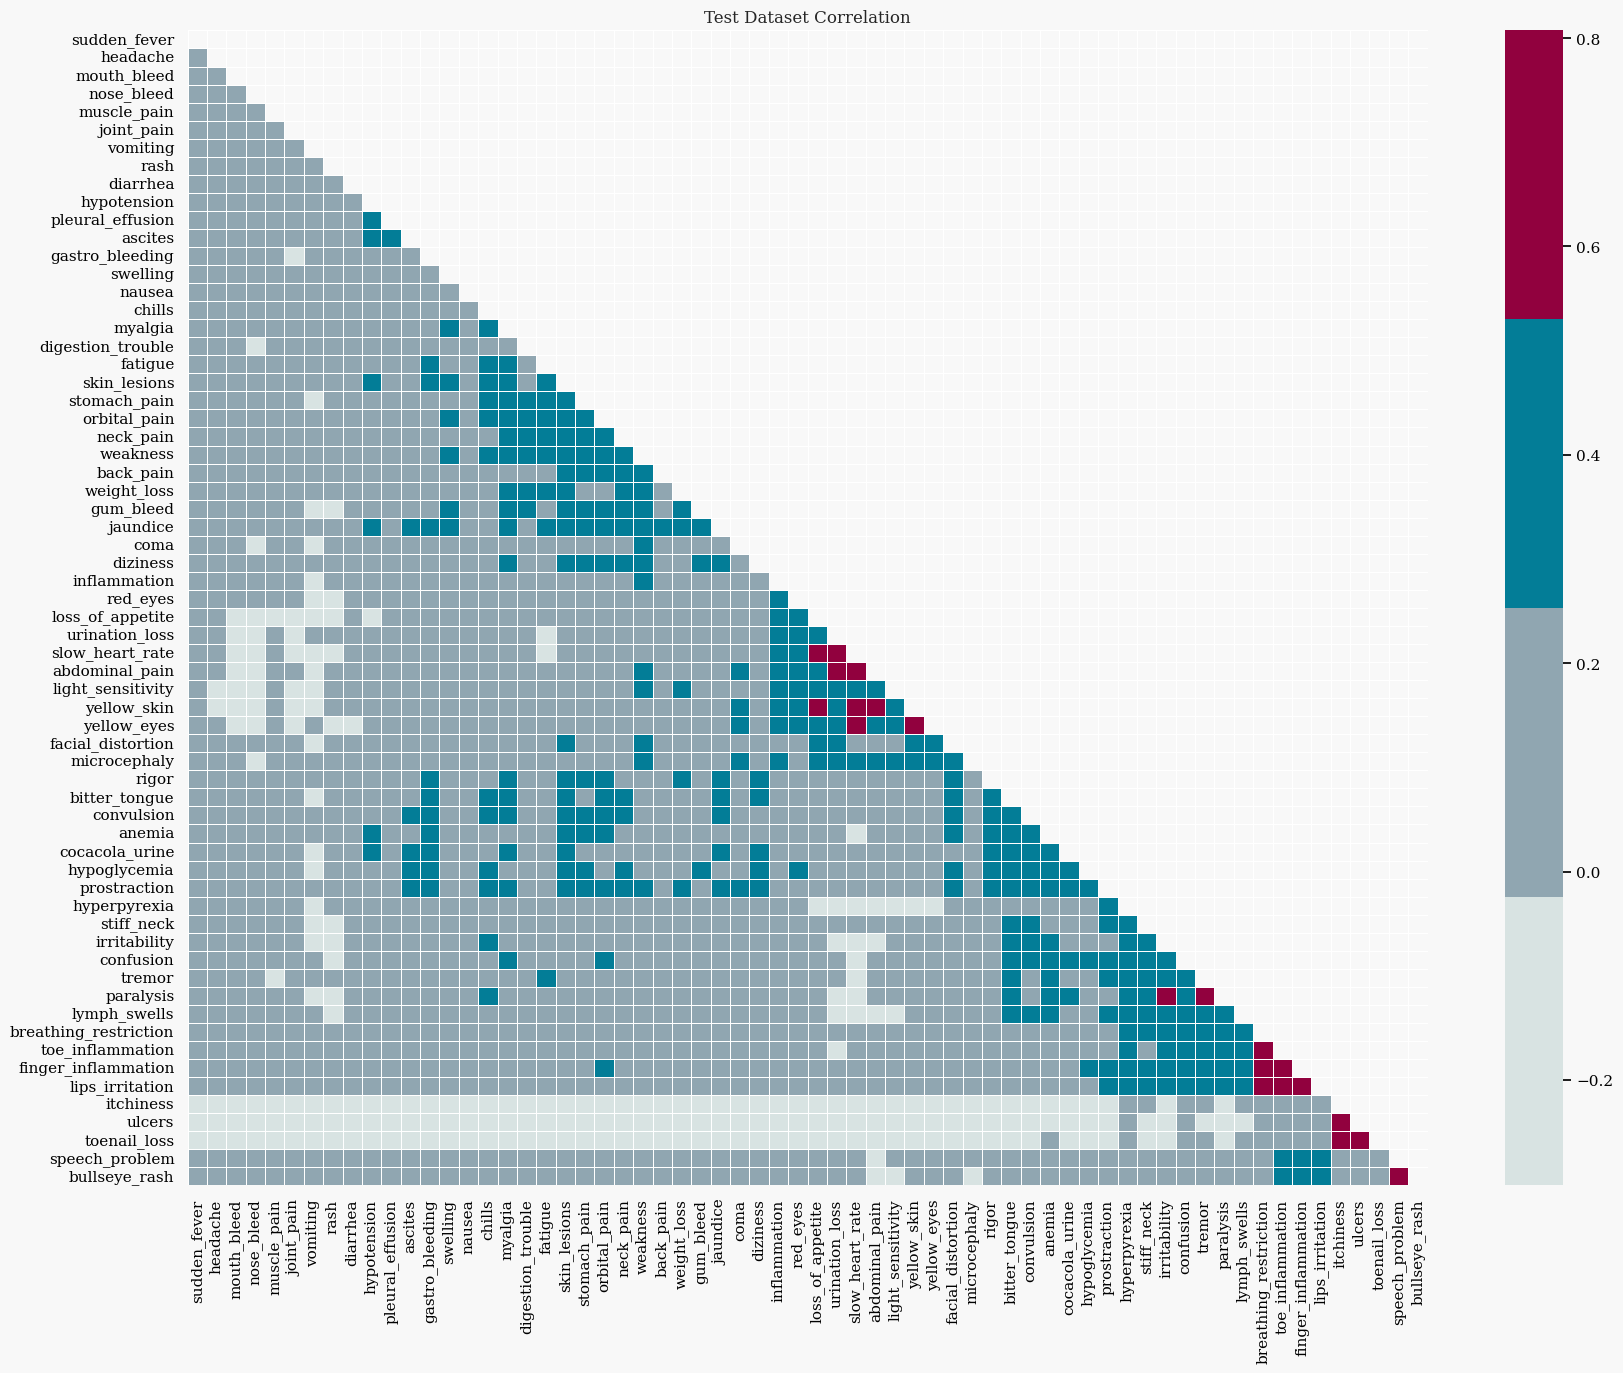

In [11]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    """Draws the correlation heatmap plot.
    
    Args:
        df: train or test dataframes
        title_name: 'Train' or 'Test' (default 'Train correlation')
        
    Returns:
        subplots of size (len(col_list), 2)
    """

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(20, 15))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap=palette[5:][::-2] + palette[1:3], annot=False)
    plt.title(title_name)
    plt.show()

plot_correlation_heatmap(origin, 'Original Dataset Correlation')
plot_correlation_heatmap(train, 'Train Dataset Correlation')
plot_correlation_heatmap(train, 'Test Dataset Correlation')

**Notes:**

In medicine, it is common for some symptoms of a disease to follow or be associated with others due to various reasons.
* `Pathophysiology`: Different symptoms of a disease may arise from the same underlying pathophysiological processes. For example, inflammation can cause redness, swelling, and pain in a specific area of the body. Similarly, an infectious disease may cause fever, fatigue, and body aches due to the immune response triggered by the infection.

* `Anatomical or physiological connections`: Symptoms that are anatomically or physiologically connected may occur together. For example, a blockage in a blood vessel can cause symptoms such as pain, pallor, and weakness in the area of the body that is supplied by that vessel. Similarly, a disease affecting a specific organ or system in the body may cause symptoms related to that organ or system.

* `Co-occurrence by chance`: Sometimes, multiple symptoms of a disease may co-occur by chance, without any direct relationship. This could be due to individual variation in the presentation of the disease or other factors such as age, sex, or genetic predisposition.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Feature Engineering</p>

In [12]:
pain = train.columns[train.columns.str.contains('pain')]
inflammation = train.columns[train.columns.str.contains('inflammation')]
bleeding = train.columns[train.columns.str.contains('bleed')]
skin = train.columns[train.columns.str.contains('bleed')].tolist() + ['itchiness']

In [13]:
class DataProcessor:
    def __init__(self,
                 train_data=None,
                 test_data=None,
                 combined: bool = True,
                 verbose: bool = False):
        self.origin_data = origin
        self.train_data = train_data
        self.test_data = test_data
        self.combined = combined
        self.verbose = verbose

        if self.verbose:
            print(f'{blk}[INFO] Shapes before feature engineering:'
                  f'{blk}\n[+] train  -> {red}{self.train_data.shape}'
                  f'{blk}\n[+] test   -> {red}{self.test_data.shape}\n')
            
    @staticmethod
    def fe(df):
        # symptom clusters:
        cluster_0 = df.columns[df.columns.str.contains('pain')]
        cluster_1 = df.columns[df.columns.str.contains('inflammation')]
        cluster_2 = df.columns[df.columns.str.contains('bleed')]
        cluster_3 = df.columns[df.columns.str.contains('skin')].tolist() + ['myalgia']
        
        df['cluster_0'] = df[cluster_0].sum(axis=1)
#         df['cluster_1'] = df[cluster_1].sum(axis=1)
#         df['cluster_2'] = df[cluster_2].sum(axis=1)
        df['cluster_3'] = df[cluster_3].sum(axis=1)
        return df              
                               
    def process_data(self):
        
        self.train_data = self.fe(self.train_data)
        self.test_data = self.fe(self.test_data)

        if self.combined:
            cols = self.train_data.columns
            self.origin_data = self.fe(self.origin_data)
            self.train_data = pd.concat([self.train_data, self.origin_data])
            self.train_data = self.train_data.drop_duplicates(subset=cols).reset_index(drop=True)

        if self.verbose:
            print(f'{blk}[INFO] Shapes after feature engineering:'
                  f'{blk}\n[+] train  -> {red}{self.train_data.shape}'
                  f'{blk}\n[+] test   -> {red}{self.test_data.shape}\n')

        return self.train_data, self.test_data
    
f_e = DataProcessor(train, test, verbose=True)
train, test = f_e.process_data()

[INFO] Shapes before feature engineering:
[+] train  -> (707, 65)
[+] test   -> (303, 64)

[INFO] Shapes after feature engineering:
[+] train  -> (959, 67)
[+] test   -> (303, 66)



## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Base XGB Model</p>

In [14]:
def log_loss(y_true, y_pred):
    return metrics.log_loss(y_true, y_pred)

In [15]:
%%time
config = {'SEED': 142,
          'FOLDS': 15,
          'N_ESTIMATORS': 700}

xgb_params = {'objective': 'multi:softprob',
              'eval_metric': 'mlogloss',
              'num_class': 11,
              'learning_rate': 0.05,
              'max_depth': 4,
              'early_stopping_rounds': 200,
              'subsample': 0.8,
              'colsample_bytree': 0.1,
              'n_jobs': -1,
              'verbosity': 0,
              'random_state': 42}


mapper = {k: v for v, k in enumerate(train.prognosis.unique())}
X, y = train.drop(columns='prognosis'), train.prognosis.map(mapper)

cv = model_selection.StratifiedKFold(n_splits=config['FOLDS'], shuffle=True, random_state=config['SEED'])
feature_importances_ = pd.DataFrame(index=X.columns)
metric = log_loss
eval_results_ = {}
models_ = []
oof = np.zeros((len(X), 11))

for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y), start=1):

    # Split the dataset according to the fold indexes.
    X_fit = X.iloc[fit_idx]
    X_val = X.iloc[val_idx]
    y_fit = y.iloc[fit_idx]
    y_val = y.iloc[val_idx]

    # XGB .train() requires xgboost.DMatrix.
    # https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.DMatrix
    fit_set = xgb.DMatrix(X_fit, y_fit)
    val_set = xgb.DMatrix(X_val, y_val)
    watchlist = [(fit_set, 'fit'), (val_set, 'val')]

    # Training.
    # https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.training
    eval_results_[fold] = {}
    model = xgb.train(
        num_boost_round=config['N_ESTIMATORS'],
        params=xgb_params,
        dtrain=fit_set,
        evals=watchlist,
        evals_result=eval_results_[fold],
        verbose_eval=False,
        callbacks=[
            EarlyStopping(xgb_params['early_stopping_rounds'],
                          data_name='val', save_best=True)],
    )
    
    val_preds = model.predict(val_set)
    oof[val_idx] = val_preds

    val_score = metric(y_val, val_preds)
    best_iter = model.best_iteration
    print(f'Fold: {blu}{fold:>3}{res}| {metric.__name__}: {blu}{val_score:.5f}{res}'
          f' | Best iteration: {blu}{best_iter:>4}{res}')

    # Stores the feature importances
    feature_importances_[f'gain_{fold}'] = feature_importances_.index.map(model.get_score(importance_type='gain'))
    feature_importances_[f'split_{fold}'] = feature_importances_.index.map(model.get_score(importance_type='weight'))

    # Stores the model
    models_.append(model)

mean_cv_score = metric(y, oof)
print(f'{"*" * 50}\n{red}Mean{res} {metric.__name__}: {red}{mean_cv_score:.5f}')

Fold:   1| log_loss: 1.54390 | Best iteration:  308
Fold:   2| log_loss: 1.81169 | Best iteration:  206
Fold:   3| log_loss: 1.46762 | Best iteration:  359
Fold:   4| log_loss: 1.68032 | Best iteration:  379
Fold:   5| log_loss: 1.52279 | Best iteration:  415
Fold:   6| log_loss: 1.69378 | Best iteration:  213
Fold:   7| log_loss: 1.66634 | Best iteration:  261
Fold:   8| log_loss: 1.53073 | Best iteration:  431
Fold:   9| log_loss: 1.74433 | Best iteration:  209
Fold:  10| log_loss: 1.62456 | Best iteration:  272
Fold:  11| log_loss: 1.51343 | Best iteration:  352
Fold:  12| log_loss: 1.75314 | Best iteration:  210
Fold:  13| log_loss: 1.89373 | Best iteration:  306
Fold:  14| log_loss: 1.57728 | Best iteration:  338
Fold:  15| log_loss: 1.60907 | Best iteration:  314
**************************************************
Mean log_loss: 1.64222
CPU times: user 5min 37s, sys: 7.32 s, total: 5min 44s
Wall time: 1min 28s


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Training Summary</p>

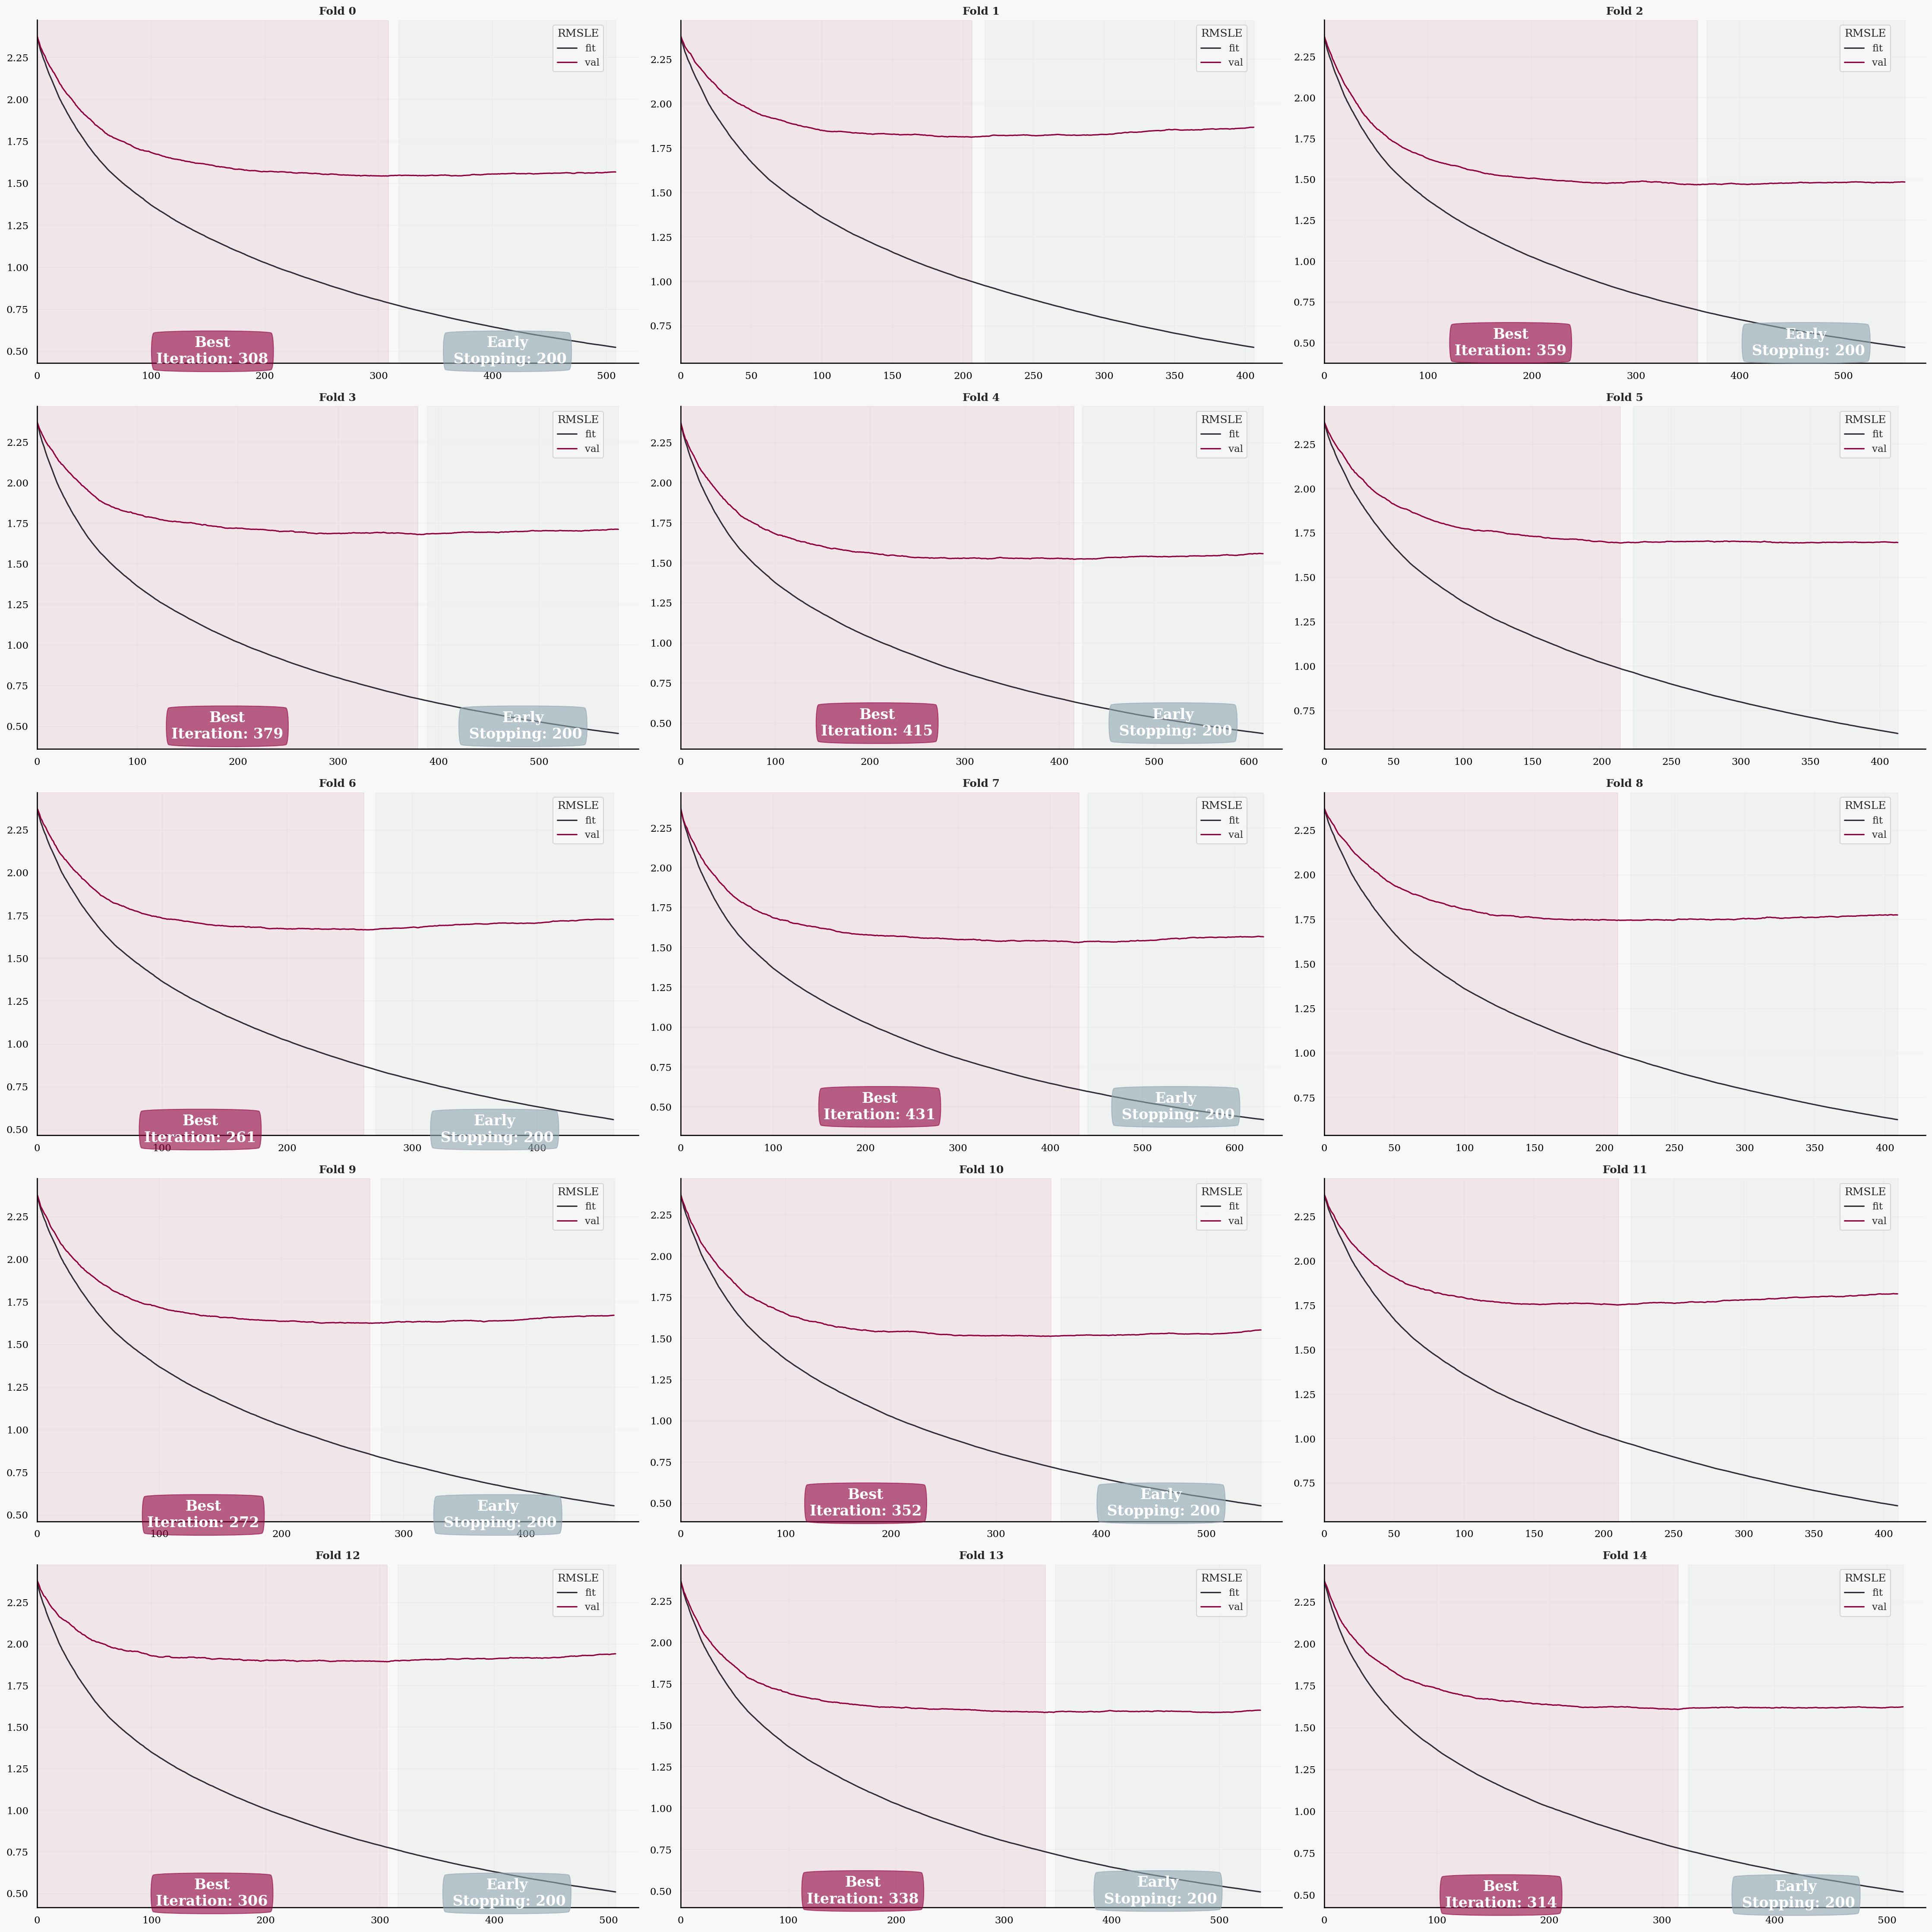

In [16]:
metric_score_folds = pd.DataFrame.from_dict(eval_results_).T
fit_logloss = metric_score_folds.fit.apply(lambda x: x['mlogloss'])
val_logloss = metric_score_folds.val.apply(lambda x: x['mlogloss'])

fig, axes = plt.subplots(math.ceil(config['FOLDS']/3), 3, figsize=(30, 30), dpi=150)
ax = axes.flatten()
for i, (f, v, m) in enumerate(zip(fit_logloss, val_logloss, models_)): 
    sns.lineplot(f, color=palette[0], ax=ax[i], label='fit')
    sns.lineplot(v, color='#91013E', ax=ax[i], label='val')
    ax[i].legend()
    ax[i].spines['top'].set_visible(False);
    ax[i].spines['right'].set_visible(False)
    ax[i].set_title(f'Fold {i}', fontdict={'fontweight': 'bold'})
    
    color =  ['#91013E', palette[-3]]
    best_iter = m.best_iteration
    span_range = [[0, best_iter], [best_iter + 10, best_iter + xgb_params['early_stopping_rounds']]]
    
    for idx, sub_title in enumerate([f'Best\nIteration: {best_iter}', f'Early\n Stopping: {xgb_params["early_stopping_rounds"]}']):
        ax[i].annotate(sub_title,
                    xy=(sum(span_range[idx])/2 , 0.5),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax[i].axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
        
    ax[i].set_xlim(0, best_iter + 20 + xgb_params["early_stopping_rounds"])
    ax[i].legend(bbox_to_anchor=(0.95, 1), loc='upper right', title='RMSLE')

plt.tight_layout();

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Feature importances and OOF errors</p>

**There are** [several types of importance](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score) in the Xgboost. It can be computed in several different ways. The default type is gain if you construct model with scikit-learn like API (docs). When you access Booster object and get the importance with get_score method, then default is weight. You can check the type of the importance with xgb.importance_type.
* The `gain` shows the average gain across all splits the feature is used in.
* The `weight` shows  the number of times a feature is used to split the data across all trees.

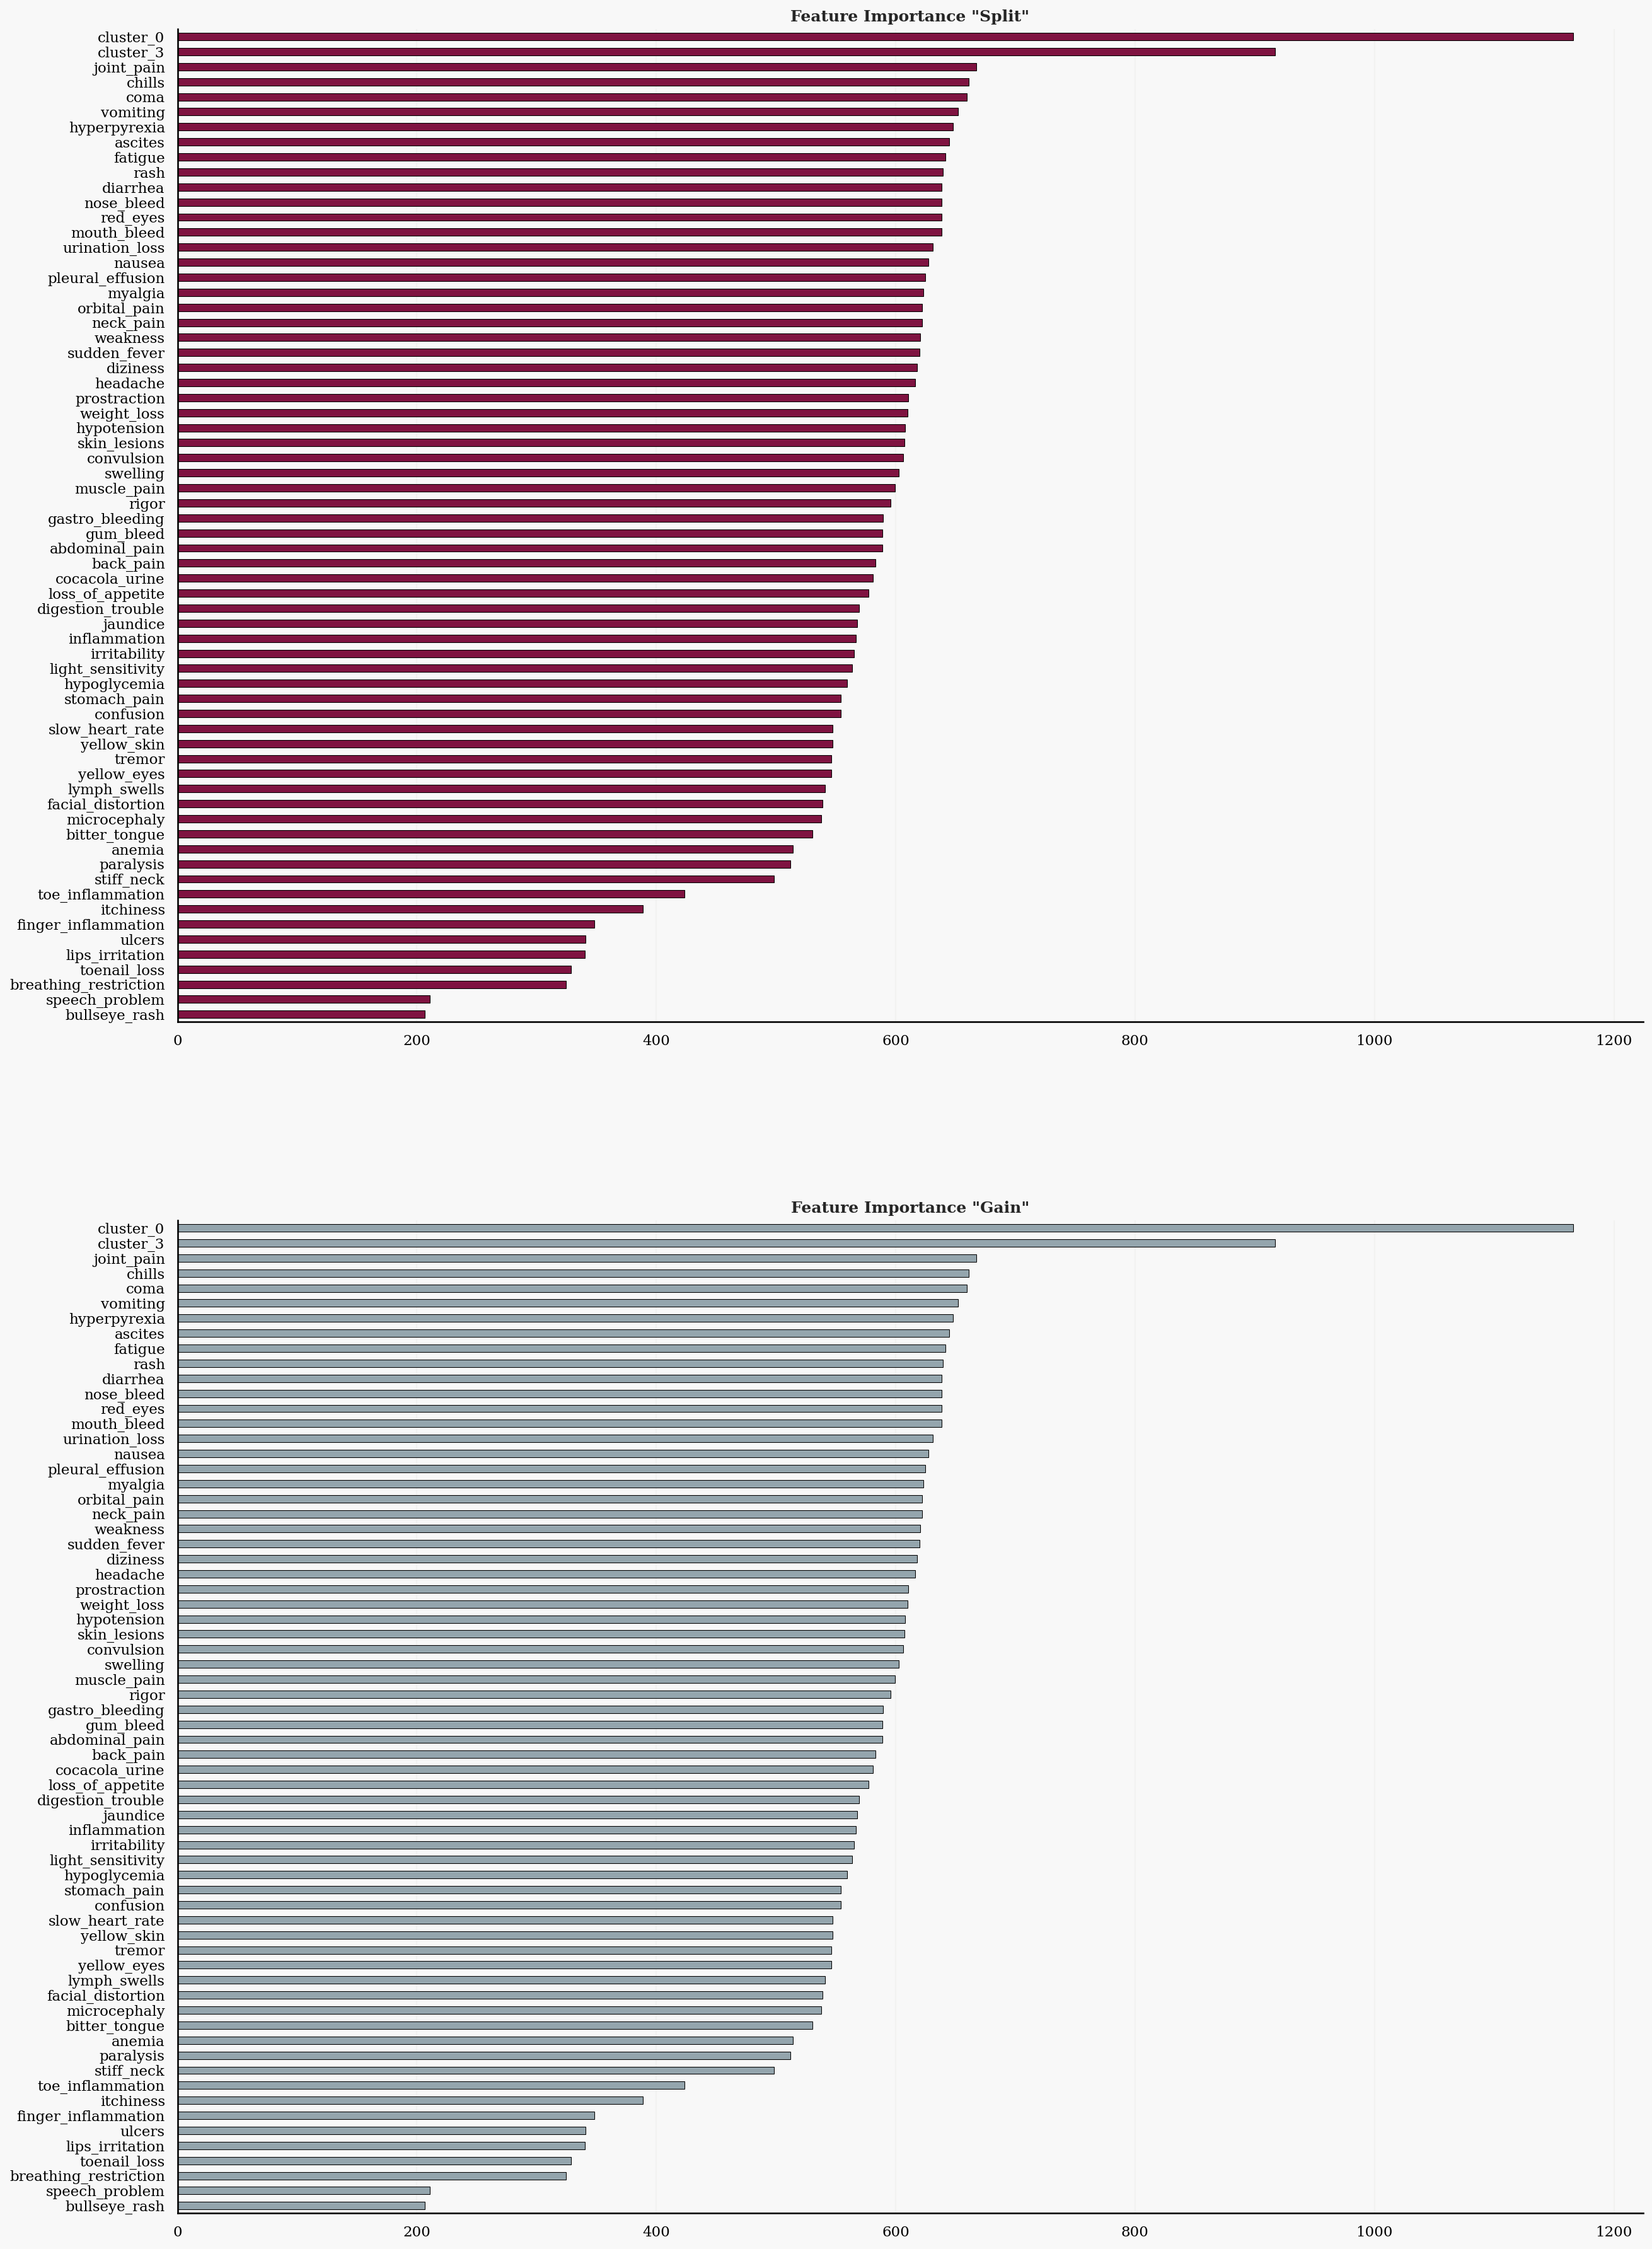

In [17]:
fi = feature_importances_
fi_gain = fi[[col for col in fi.columns if col.startswith('gain')]].mean(axis=1)
fi_splt = fi[[col for col in fi.columns if col.startswith('split')]].mean(axis=1)

fig, ax = plt.subplots(2, 1, figsize=(20, 30), dpi=150)
ax = ax.flatten()
# Split fi.
data_splt = fi_splt.sort_values(ascending=False)
sns.barplot(x=data_splt.values, y=data_splt.index, 
            color=palette[2], linestyle="-", width=0.5, errorbar='sd',
            linewidth=0.5, edgecolor="black", ax=ax[0])
ax[0].set_title(f'Feature Importance "Split"', fontdict={'fontweight': 'bold'})
ax[0].set(xlabel=None)

for s in ['right', 'top']:
    ax[0].spines[s].set_visible(False)
ax[0]
# Gain fi.    
data_gain = fi_splt.sort_values(ascending=False)
sns.barplot(x=data_gain.values, y=data_gain.index,
            color=palette[-3], linestyle="-", width=0.5, errorbar='sd',
            linewidth=0.5, edgecolor="black", ax=ax[1])
ax[1].set_title(f'Feature Importance "Gain"', fontdict={'fontweight': 'bold'})
ax[1].set(xlabel=None)

for s in ['right', 'top']:
    ax[1].spines[s].set_visible(False)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

def show_confusion_roc(y: np.array, oof: np.array) -> None:
    """Draws a confusion matrixs.
        
        Args:
            oof: predictions for each fold stacked. 
        
        Returns:
            None
    """
    
    f, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
    cm = confusion_matrix(y, oof.argmax(axis=1))
    cm_display = ConfusionMatrixDisplay(cm).plot(cmap=sns.light_palette(palette[2], as_cmap=True), ax=ax, values_format='5g')
    ax.grid(False)
    ax.set_yticklabels(mapper.keys())
    ax.set_xticklabels(mapper.keys(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
def show_confusion_map3k(y: np.array, oof: np.array) -> None:
    """Draws a confusion matrixs.
        
        Args:
            y: true labels.
            oof: predictions for each fold stacked. 
        
        Returns:
            None
    """
    pred_df = np.hstack([np.argsort(-oof)[:, :3], y.values.reshape((-1, 1))])
    frame = pd.DataFrame(pred_df, columns=['y_pred1', 'y_pred2', 'y_pred3', 'y_true'])
    frame['y_pred_correct_@1'] = frame.y_pred1.eq(frame.y_true).astype(int)
    frame['y_pred_correct_@2'] = frame.y_pred2.eq(frame.y_true).astype(int)
    frame['y_pred_correct_@3'] = frame.y_pred3.eq(frame.y_true).astype(int)

    frame['no_correct_preds'] = frame.iloc[:, -3:].sum(1).eq(0).astype(int)
    pivot = frame.groupby(by='y_true').sum()[['y_pred_correct_@1', 'y_pred_correct_@2', 'y_pred_correct_@3', 'no_correct_preds']].T
    pivot.columns = mapper.keys()
    slice_ = pd.IndexSlice[pivot.index[[0, -1]], pivot.columns]
    display(stylize_simple(pivot, 'MAP@3 Confusion Matrix').background_gradient(cm, subset=slice_))

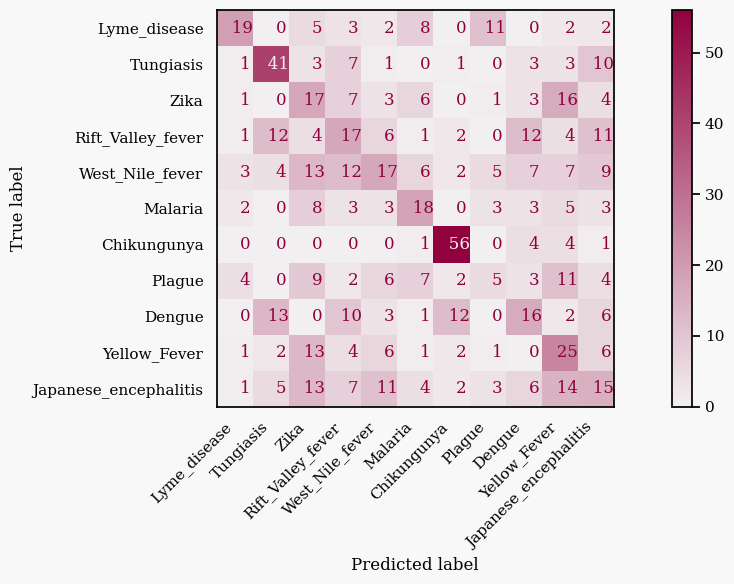

In [19]:
show_confusion_roc(y[:707], oof[:707])
show_confusion_map3k(y[:707], oof[:707])

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Submission</p>

In [20]:
def predict(X):
    y = np.zeros((len(X), 11))
    for model in tqdm(models_):
        y += model.predict(xgb.DMatrix(X))
    return np.argsort(-y)[:, :3]

predictions = predict(test)
predictions = pd.DataFrame(predictions).replace({v:k for k, v in mapper.items()})
predictions = predictions.apply(lambda x: ' '.join(x), axis=1)
sub = pd.read_csv(PATH_SUB)
sub.prognosis = predictions
sub.to_csv('submission.csv', index=False)
sub.head(3)

  0%|          | 0/15 [00:00<?, ?it/s]

id                                          prognosis
0  707  Tungiasis Rift_Valley_fever Japanese_encephalitis
1  708               Dengue Chikungunya Rift_Valley_fever
2  709         West_Nile_fever Japanese_encephalitis Zika

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Acknowledgement</p>

@jcaliz for .css and plotting ideas.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#91013E; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #91013E">Outro and future work</p>

The features engineering part is on progress. There are various categorical encoders to be tried.
I hope to continue working on the dataset and probably shoot for a TOP.  Good luck in the competition!